In [80]:
import pandas as pd
import matplotlib.pyplot as plt

In [81]:
jason = pd.read_csv(r"c:\Users\Jason\Downloads\DataScience\Jason_Teir_List.csv")
dylan = pd.read_csv(r"c:\Users\Jason\Downloads\DataScience\Dylan_Teir_List.csv")
abby = pd.read_csv(r"c:\Users\Jason\Downloads\DataScience\Abby_Teir_List.csv")

In [82]:
abby = abby[['Track', 'A', 'M', 'T', 'F']]
jason['Track'] = dylan['Track']
abby['Track'] = dylan['Track']
abby['Total'] = abby['A'] + abby['M'] + abby['T'] + abby['F']
jason['Total'] = jason['A'] + jason['M'] + jason['T'] + jason['F']
dylan['Total'] = dylan['A'] + dylan['M'] + dylan['T'] + dylan['F']
jason['A_M'] = jason['A'] + jason['M']
abby['A_M'] = abby['A'] + abby['M']
dylan['A_M'] = dylan['A'] + dylan['M']
jason['T_F'] = jason['T'] + jason['F']
abby['T_F'] = abby['T'] + abby['F']
dylan['T_F'] = dylan['T'] + dylan['F']

total = pd.DataFrame()
total['Track'] = dylan['Track']
total['Score'] = ((dylan['Total'] + jason['Total'] + abby['Total']) / 3).round(2)
total = total.sort_values(by='Score', ascending=False)

music = pd.DataFrame()
music['Track'] = dylan['Track']
music['Score'] = ((dylan['M'] + jason['M'] + abby['M']) / 3).round(2)
music = music.sort_values(by='Score', ascending=False)

pretty = pd.DataFrame()
pretty['Track'] = dylan['Track']
pretty['Score'] = ((dylan['A'] + jason['A'] + abby['A']) / 3).round(2)
pretty = pretty.sort_values(by='Score', ascending=False)

track = pd.DataFrame()
track['Track'] = dylan['Track']
track['Score'] = ((dylan['T'] + jason['T'] + abby['T']) / 3).round(2)
track = track.sort_values(by='Score', ascending=False)

fun = pd.DataFrame()
fun['Track'] = dylan['Track']
fun['Score'] = ((dylan['F'] + jason['F'] + abby['F']) / 3).round(2)
fun = fun.sort_values(by='Score', ascending=False)

In [83]:
def match_perc(df1, df2):
    count = 0
    for i in range(len(df1)):
        if abs(df1['A'][i] - df2['A'][i]) <= 1:
            count += 1
        if abs(df1['M'][i] - df2['M'][i]) <= 1:
            count += 1
        if abs(df1['T'][i] - df2['T'][i]) <= 1:
            count += 1
        if abs(df1['F'][i] - df2['F'][i]) <= 1:
            count += 1
    return (count / 384).__round__(2) 

def exact_match(df1, df2):
    count = 0
    for i in range(len(df1)):
        if df1['A'][i] == df2['A'][i]:
            count += 1
        if df1['M'][i] == df2['M'][i]:
            count += 1
        if df1['T'][i] == df2['T'][i]:
            count += 1
        if df1['F'][i] == df2['F'][i]:
            count += 1
    return (count / 384).__round__(2)

In [84]:
print('percentage of values that match within 1 point:')
print(f"Jason and Dylan match percentage: {match_perc(jason, dylan)}")
print(f"Jason and Abby match percentage: {match_perc(jason, abby)}")
print(f"Dylan and Abby match percentage: {match_perc(dylan, abby)}")
print('percentage of values that match exactly:')
print(f"Jason and Dylan exact match percentage: {exact_match(jason, dylan)}")
print(f"Jason and Abby exact match percentage: {exact_match(jason, abby)}")
print(f"Dylan and Abby exact match percentage: {exact_match(dylan, abby)}")

percentage of values that match within 1 point:
Jason and Dylan match percentage: 0.81
Jason and Abby match percentage: 0.7
Dylan and Abby match percentage: 0.73
percentage of values that match exactly:
Jason and Dylan exact match percentage: 0.37
Jason and Abby exact match percentage: 0.32
Dylan and Abby exact match percentage: 0.28


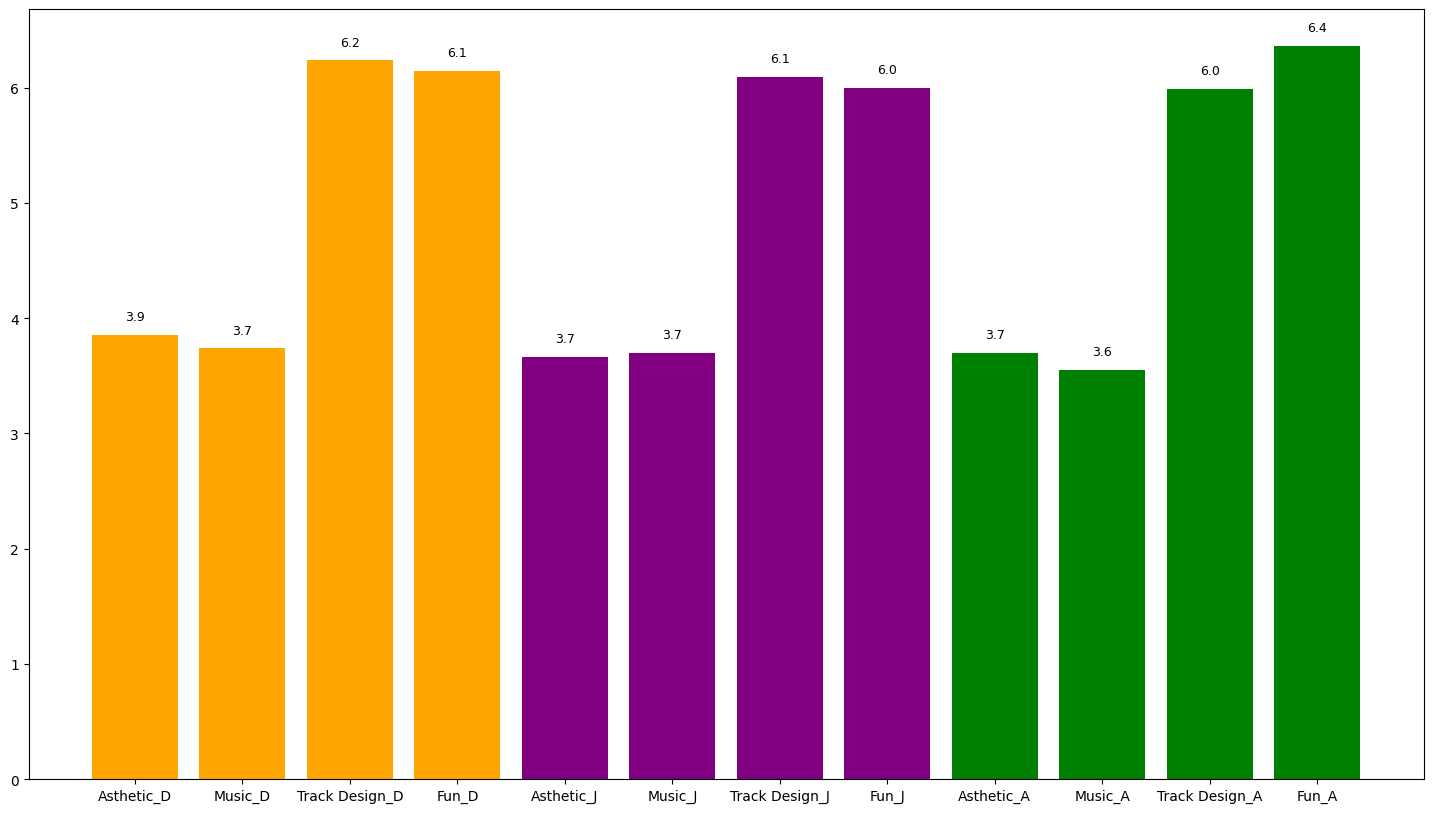

In [85]:
means = [dylan['A'].mean(), dylan['M'].mean(), dylan['T'].mean(), dylan['F'].mean(),
         jason['A'].mean(), jason['M'].mean(), jason['T'].mean(), jason['F'].mean(),
         abby['A'].mean(), abby['M'].mean(), abby['T'].mean(), abby['F'].mean()]
lables = ['Asthetic_D', 'Music_D', 'Track Design_D', 'Fun_D', 'Asthetic_J', 'Music_J', 'Track Design_J', 'Fun_J', 'Asthetic_A', 'Music_A', 'Track Design_A', 'Fun_A']
colors = ['Orange', 'Orange', 'Orange', 'Orange', 'Purple', 'Purple', 'Purple', 'Purple', 'Green', 'Green', 'Green', 'Green']
plt.figure(figsize=(18, 10))
bars = plt.bar(lables, means, color=colors)
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.1,
        f'{height:.1f}',
        ha='center', va='bottom', fontsize=9
    )
plt.show()

In [86]:
total = total.sort_values(by='Score', ascending=False)
top10 = total.head(15)
bottom10 = total.tail(10)
top10_val = top10['Score'].tolist()
bottom10_val = bottom10['Score'].tolist()
top10_labels = top10['Track'].tolist()
bottom10_labels = bottom10['Track'].tolist()

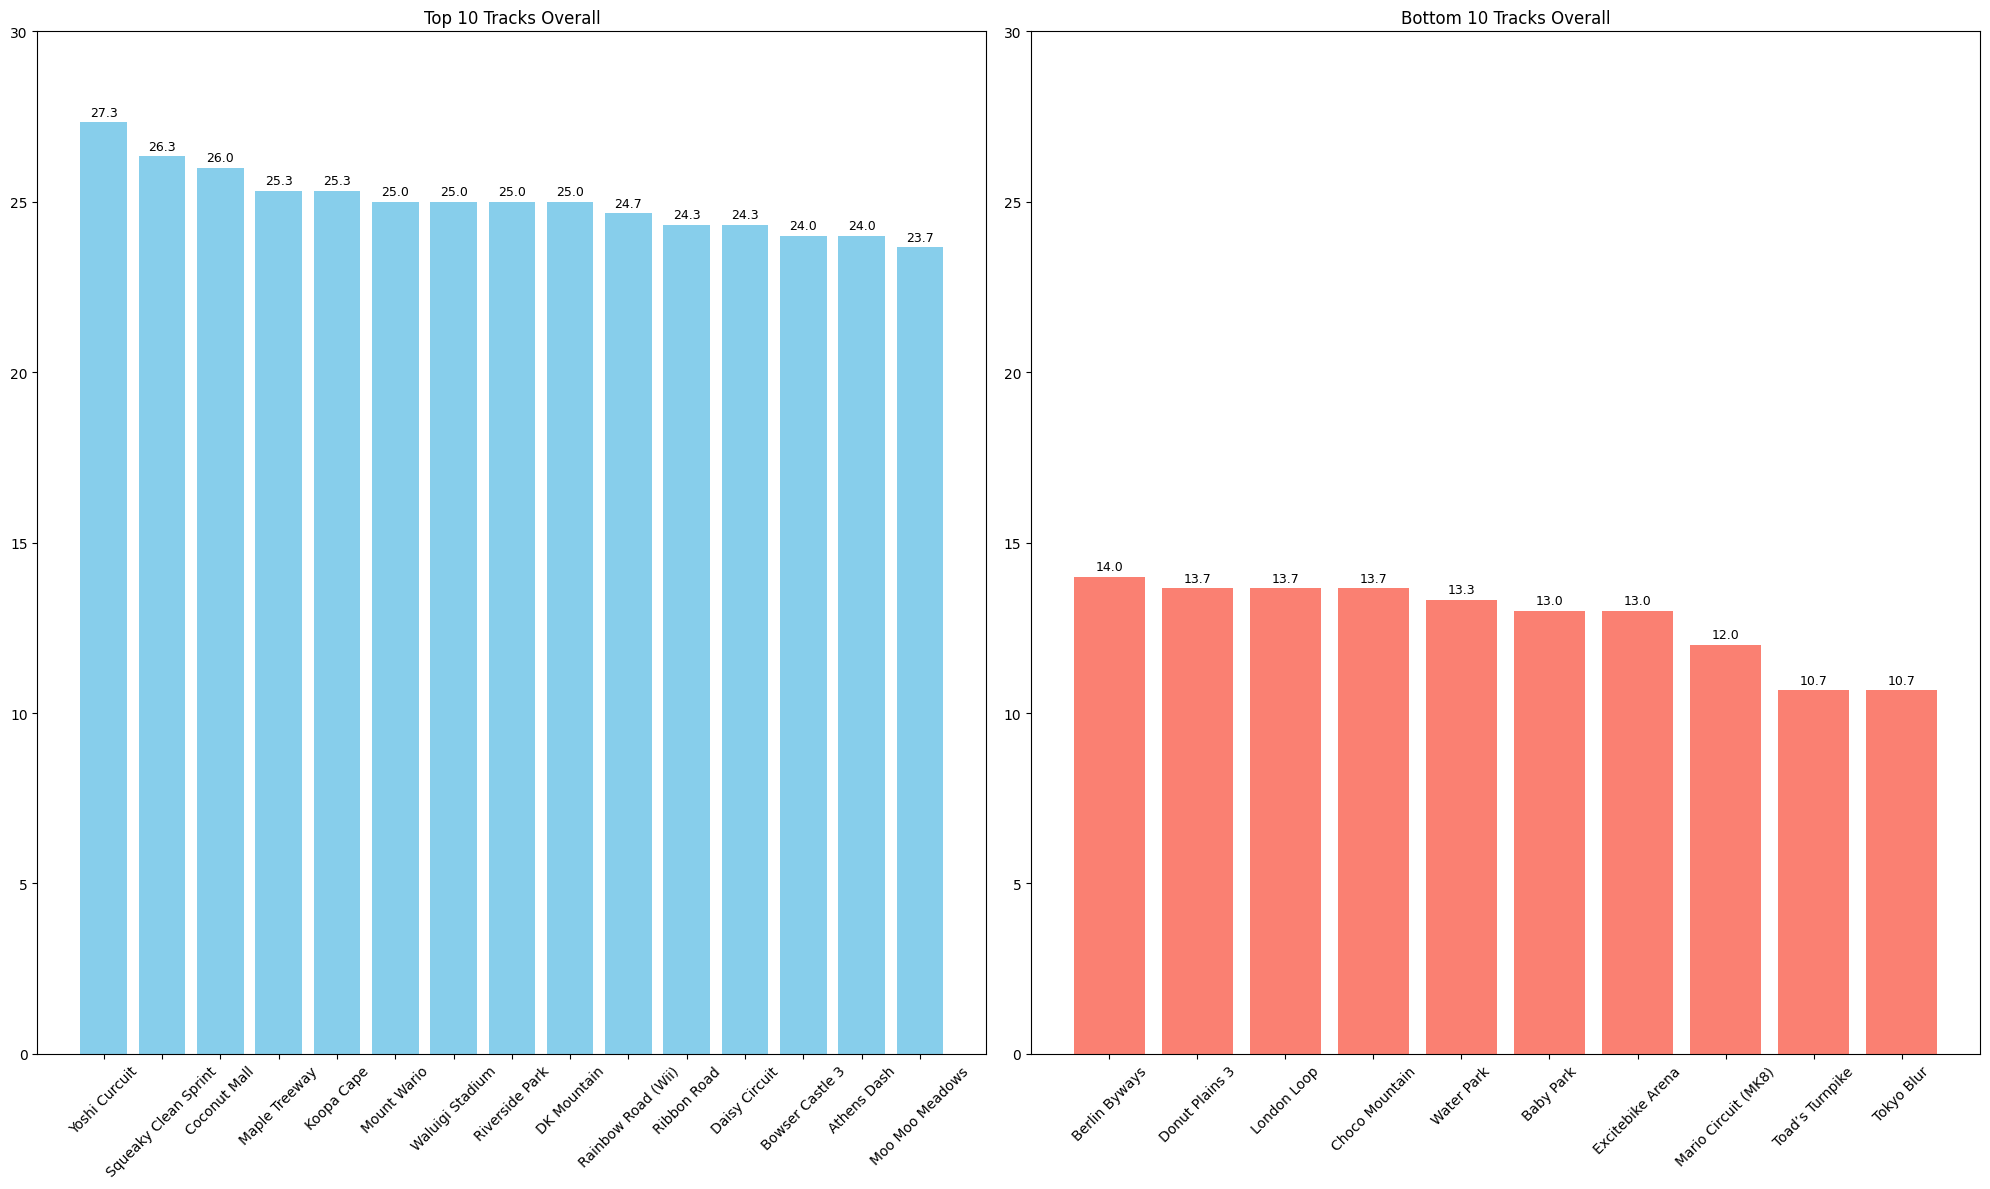

In [87]:
plt.figure(figsize=(20, 12))

# First 10
plt.subplot(1, 2, 1)
plt.ylim(0, 30)
bars = plt.bar(top10_labels, top10_val, color='skyblue')
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.1,
        f'{height:.1f}',
        ha='center', va='bottom', fontsize=9
    )
plt.title('Top 10 Tracks Overall')
plt.xticks(rotation=45)

# Last 10
plt.subplot(1, 2, 2)
plt.ylim(0, 30)
bars = plt.bar(bottom10_labels, bottom10_val, color='salmon')
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.1,
        f'{height:.1f}',
        ha='center', va='bottom', fontsize=9
    )
plt.title('Bottom 10 Tracks Overall')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [88]:
top10 = music.head(15)
bottom10 = music.tail(15)
top10_val = top10['Score'].tolist()
bottom10_val = bottom10['Score'].tolist()
top10_labels = top10['Track'].tolist()
bottom10_labels = bottom10['Track'].tolist()

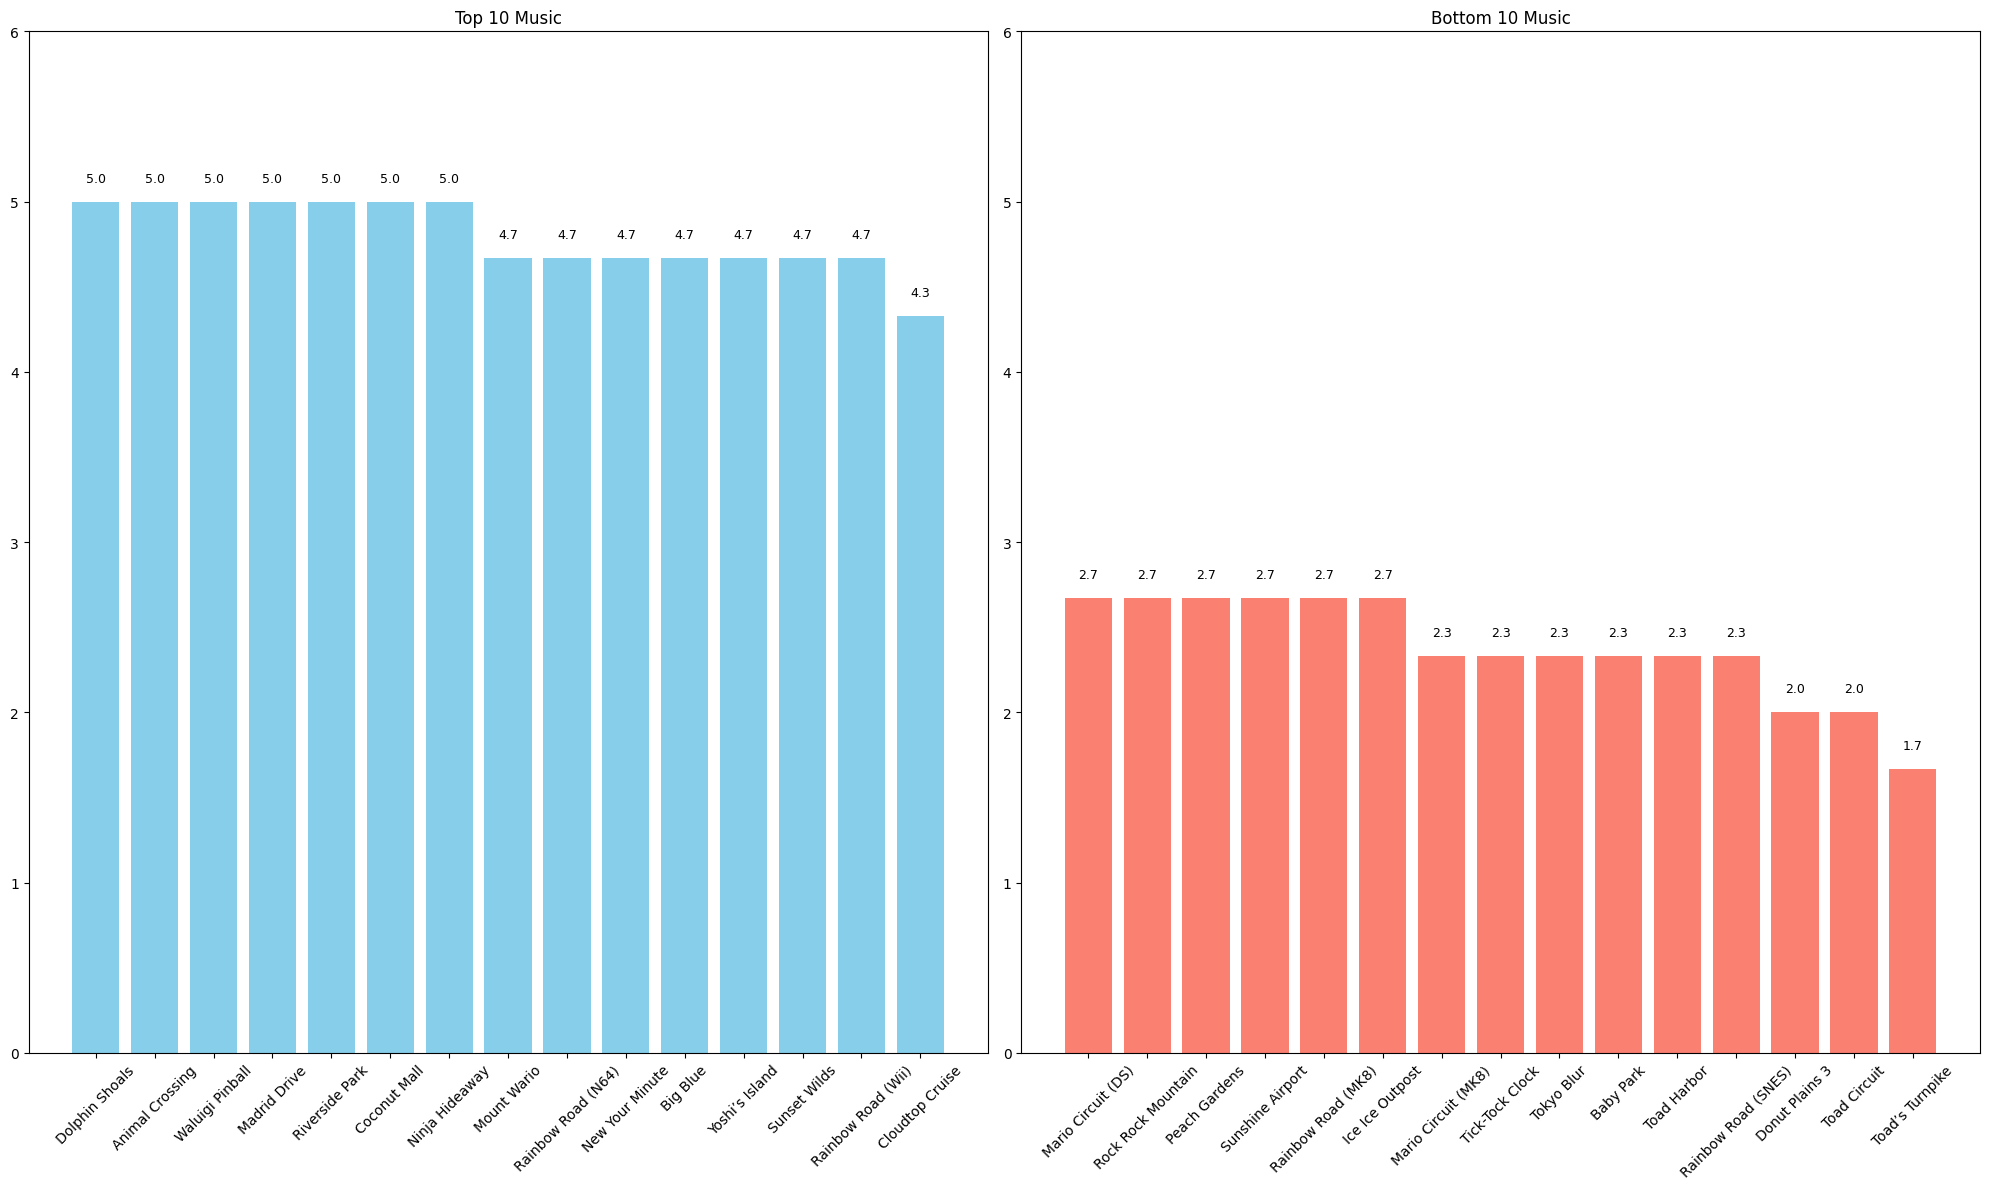

In [89]:
plt.figure(figsize=(20, 12))

# First 10
plt.subplot(1, 2, 1)
plt.ylim(0, 6)
bars = plt.bar(top10_labels, top10_val, color='skyblue')
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.1,
        f'{height:.1f}',
        ha='center', va='bottom', fontsize=9
    )
plt.title('Top 10 Music')
plt.xticks(rotation=45)

# Last 10
plt.subplot(1, 2, 2)
plt.ylim(0, 6)
bars = plt.bar(bottom10_labels, bottom10_val, color='salmon')
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.1,
        f'{height:.1f}',
        ha='center', va='bottom', fontsize=9
    )
plt.title('Bottom 10 Music')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [90]:
top10 = pretty.head(15)
bottom10 = pretty.tail(15)
top10_val = top10['Score'].tolist()
bottom10_val = bottom10['Score'].tolist()
top10_labels = top10['Track'].tolist()
bottom10_labels = bottom10['Track'].tolist()

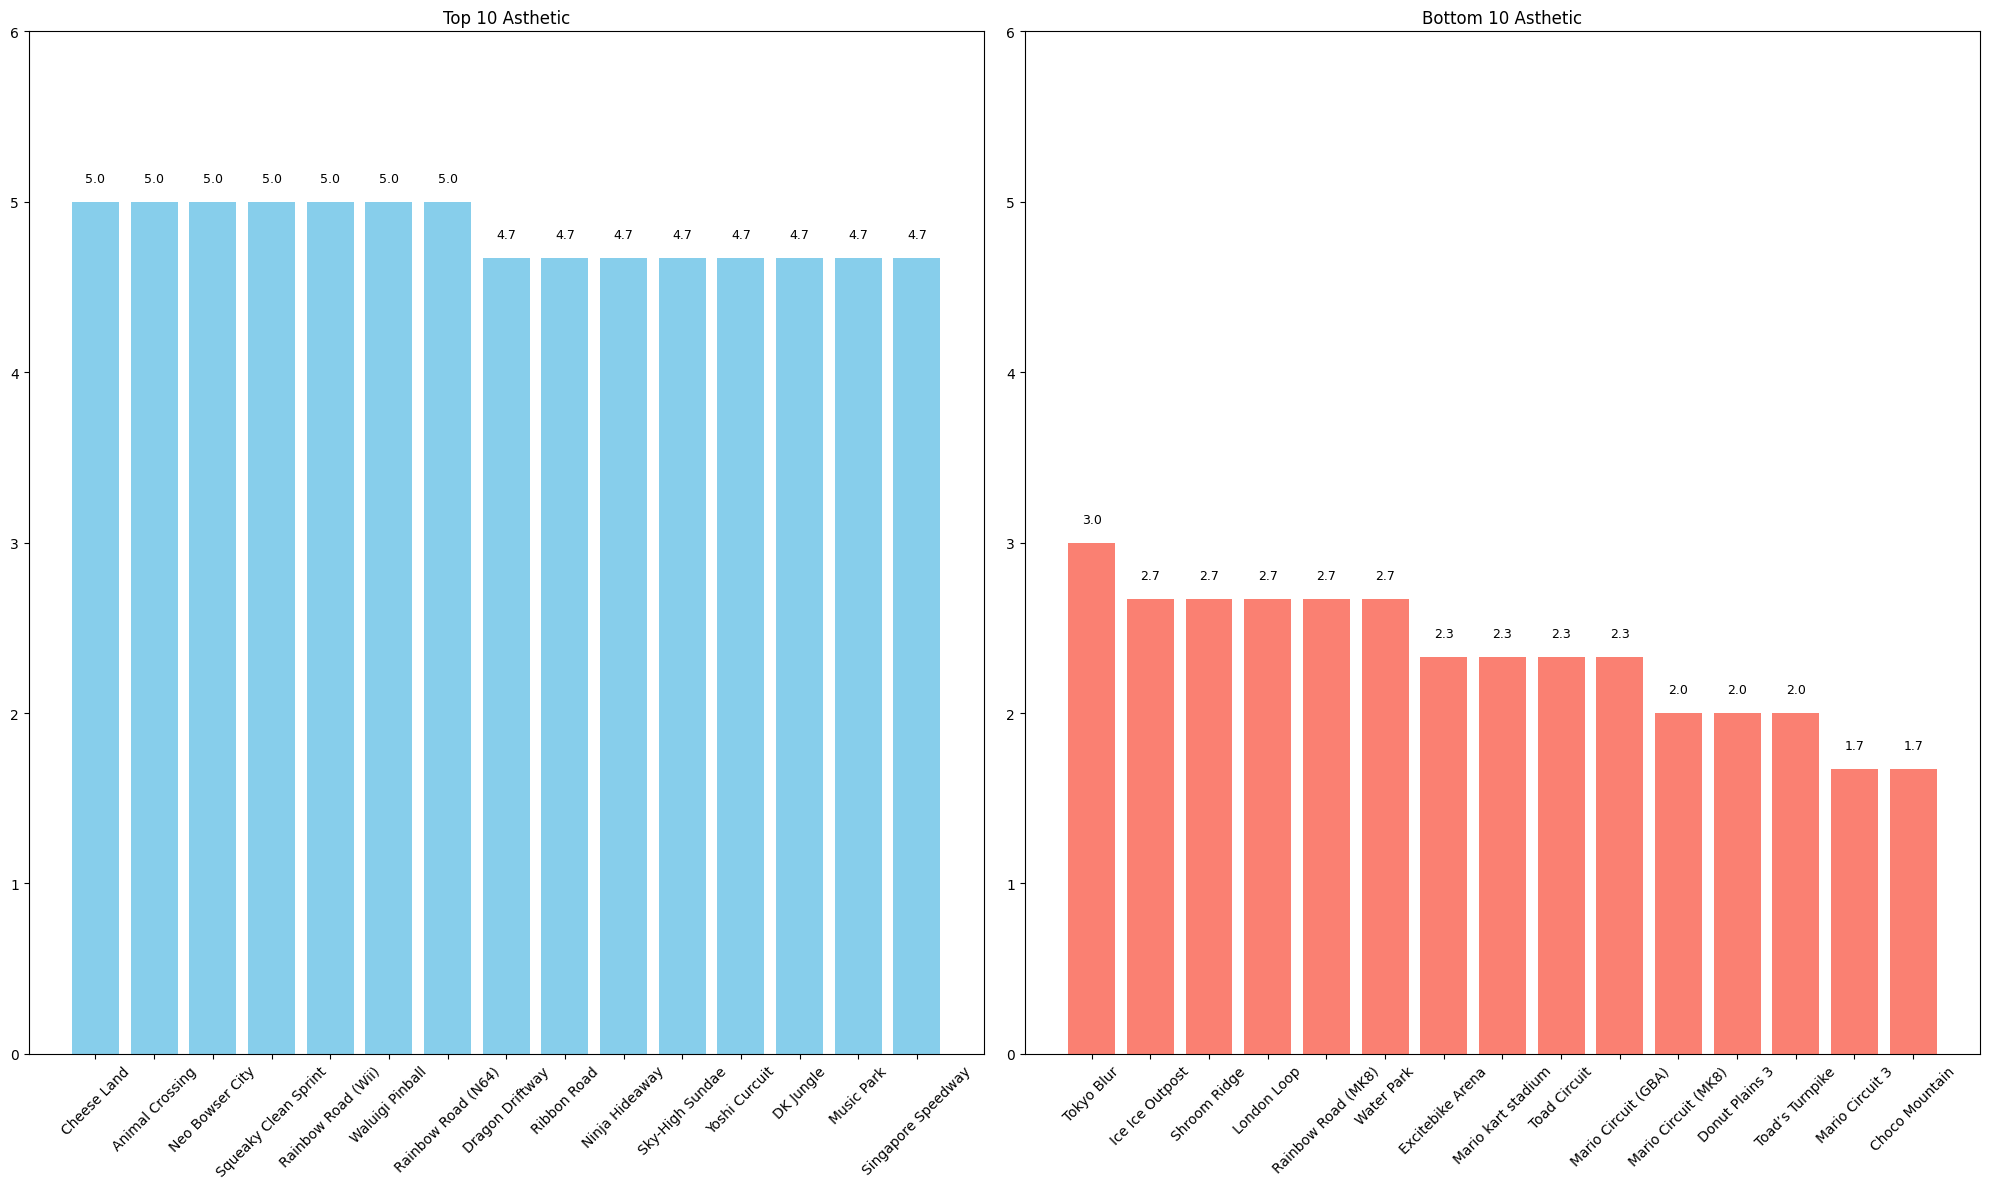

In [91]:
plt.figure(figsize=(20, 12))

# First 10
plt.subplot(1, 2, 1)
plt.ylim(0, 6)
bars = plt.bar(top10_labels, top10_val, color='skyblue')
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.1,
        f'{height:.1f}',
        ha='center', va='bottom', fontsize=9
    )
plt.title('Top 10 Asthetic')
plt.xticks(rotation=45)

# Last 10
plt.subplot(1, 2, 2)
plt.ylim(0, 6)
bars = plt.bar(bottom10_labels, bottom10_val, color='salmon')
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.1,
        f'{height:.1f}',
        ha='center', va='bottom', fontsize=9
    )
plt.title('Bottom 10 Asthetic')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [92]:
top10 = track.head(10)
bottom10 = track.tail(10)
top10_val = top10['Score'].tolist()
bottom10_val = bottom10['Score'].tolist()
top10_labels = top10['Track'].tolist()
bottom10_labels = bottom10['Track'].tolist()

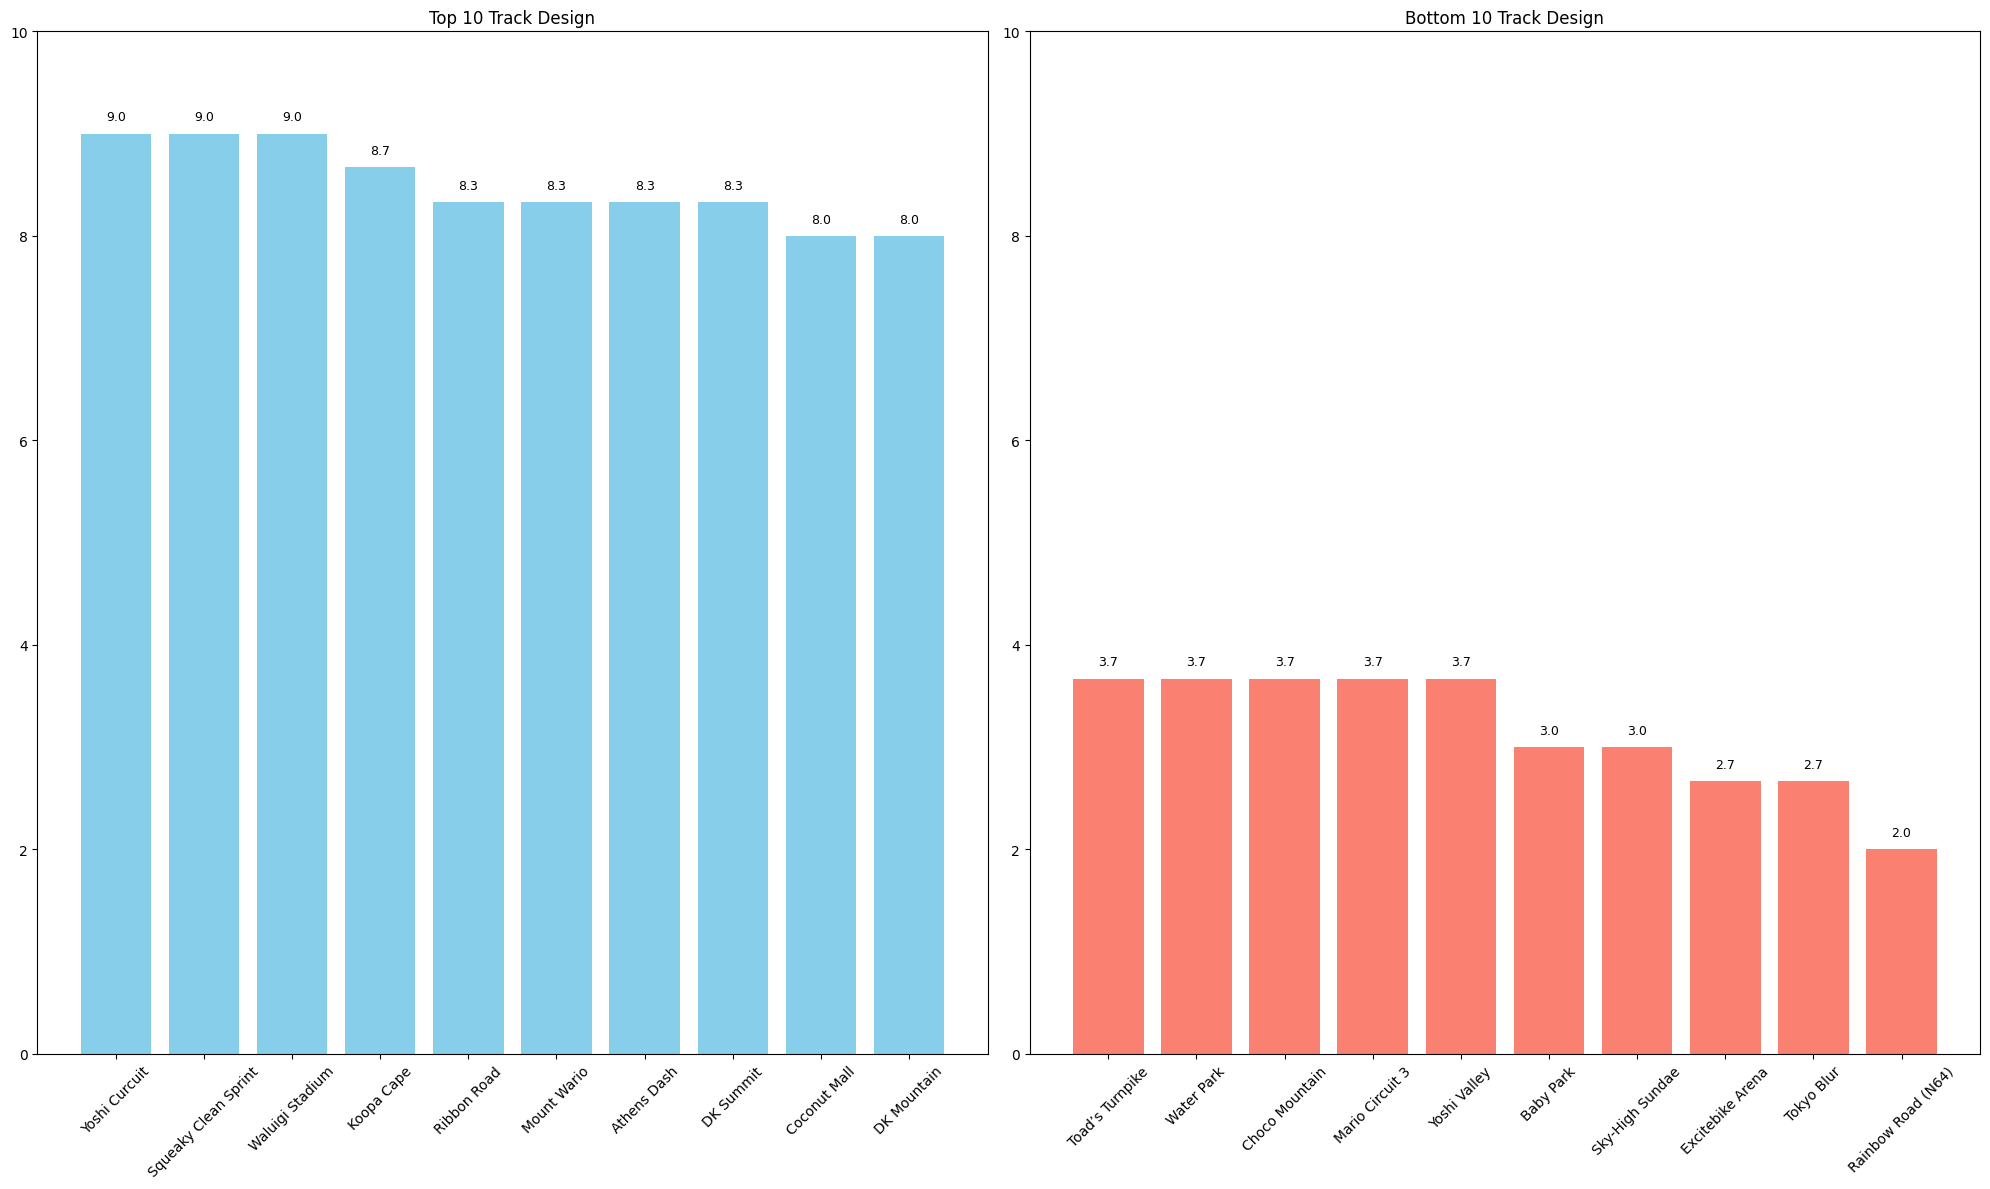

In [93]:
plt.figure(figsize=(20, 12))

# First 10
plt.subplot(1, 2, 1)
plt.ylim(0, 10)
bars = plt.bar(top10_labels, top10_val, color='skyblue')
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.1,
        f'{height:.1f}',
        ha='center', va='bottom', fontsize=9
    )
plt.title('Top 10 Track Design')
plt.xticks(rotation=45)

# Last 10
plt.subplot(1, 2, 2)
plt.ylim(0, 10)
bars = plt.bar(bottom10_labels, bottom10_val, color='salmon')
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.1,
        f'{height:.1f}',
        ha='center', va='bottom', fontsize=9
    )
plt.title('Bottom 10 Track Design')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [94]:
top10 = fun.head(10)
bottom10 = fun.tail(10)
top10_val = top10['Score'].tolist()
bottom10_val = bottom10['Score'].tolist()
top10_labels = top10['Track'].tolist()
bottom10_labels = bottom10['Track'].tolist()

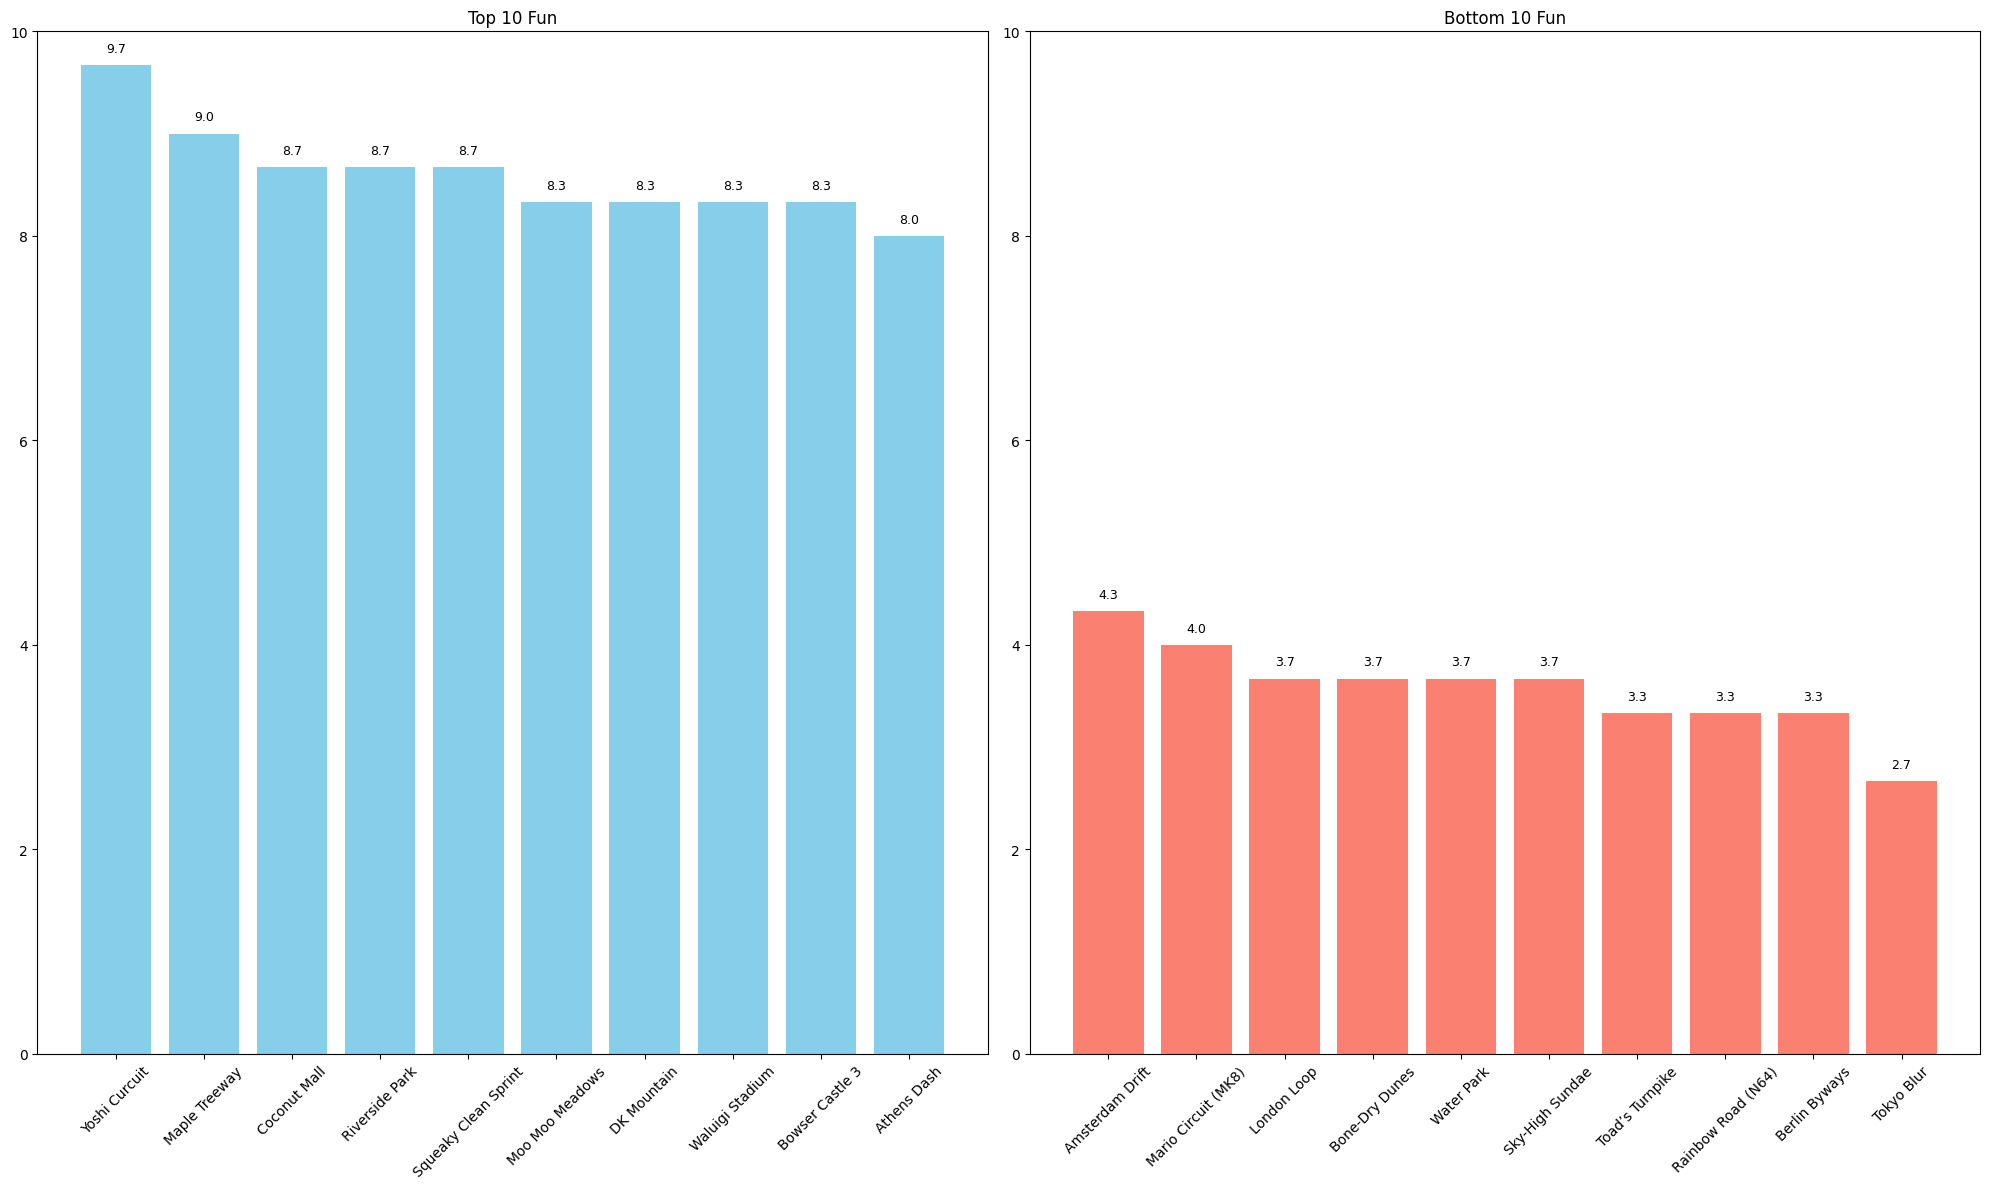

In [95]:
plt.figure(figsize=(20, 12))

# First 10
plt.subplot(1, 2, 1)
plt.ylim(0, 10)
bars = plt.bar(top10_labels, top10_val, color='skyblue')
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.1,
        f'{height:.1f}',
        ha='center', va='bottom', fontsize=9
    )
plt.title('Top 10 Fun')
plt.xticks(rotation=45)

# Last 10
plt.subplot(1, 2, 2)
plt.ylim(0, 10)
bars = plt.bar(bottom10_labels, bottom10_val, color='salmon')
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.1,
        f'{height:.1f}',
        ha='center', va='bottom', fontsize=9
    )
plt.title('Bottom 10 Fun')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Jason Music Scores:
M
1     1
2    11
3    26
4    36
5    22
Name: count, dtype: int64
Dylan Music Scores:
M
1     1
2     7
3    28
4    40
5    20
Name: count, dtype: int64
Abby Music Scores:
M
1     1
2    18
3    27
4    27
5    23
Name: count, dtype: int64


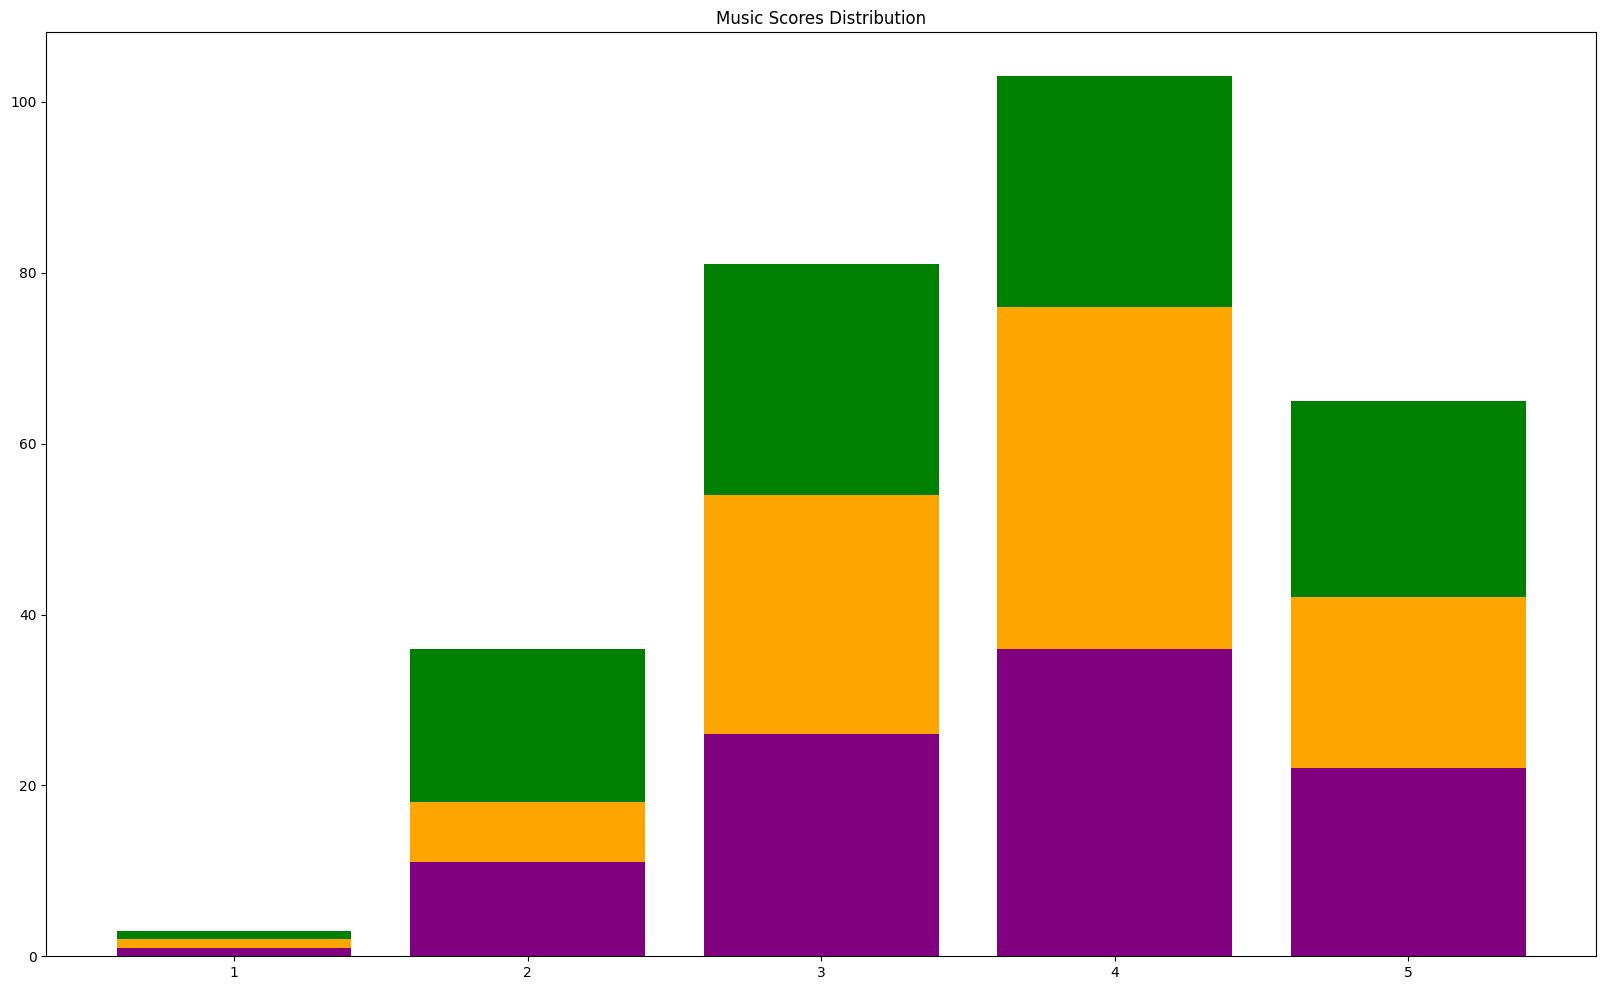

In [96]:
value_range = range(1, 6)
jason_music = jason['M'].value_counts().reindex(value_range, fill_value=0)
dylan_music = dylan['M'].value_counts().reindex(value_range, fill_value=0)
abby_music = abby['M'].value_counts().reindex(value_range, fill_value=0)
print(f"Jason Music Scores:\n{jason_music}")
print(f"Dylan Music Scores:\n{dylan_music}")
print(f"Abby Music Scores:\n{abby_music}")

plt.figure(figsize=(20, 12))
plt.title('Music Scores Distribution')
plt.bar(value_range, jason_music, color='purple', label='Jason')
plt.bar(value_range, dylan_music, color='orange', label='Dylan', bottom=jason_music)
plt.bar(value_range, abby_music, color='green', label='Abby', bottom=jason_music + dylan_music)
plt.show()

Jason Ashetic Scores:
A
1     2
2    14
3    18
4    42
5    20
Name: count, dtype: int64
Dylan Ashetic Scores:
A
1     2
2     4
3    27
4    36
5    27
Name: count, dtype: int64
Abby Ashetic Scores:
A
1     0
2    10
3    25
4    45
5    16
Name: count, dtype: int64


<BarContainer object of 5 artists>

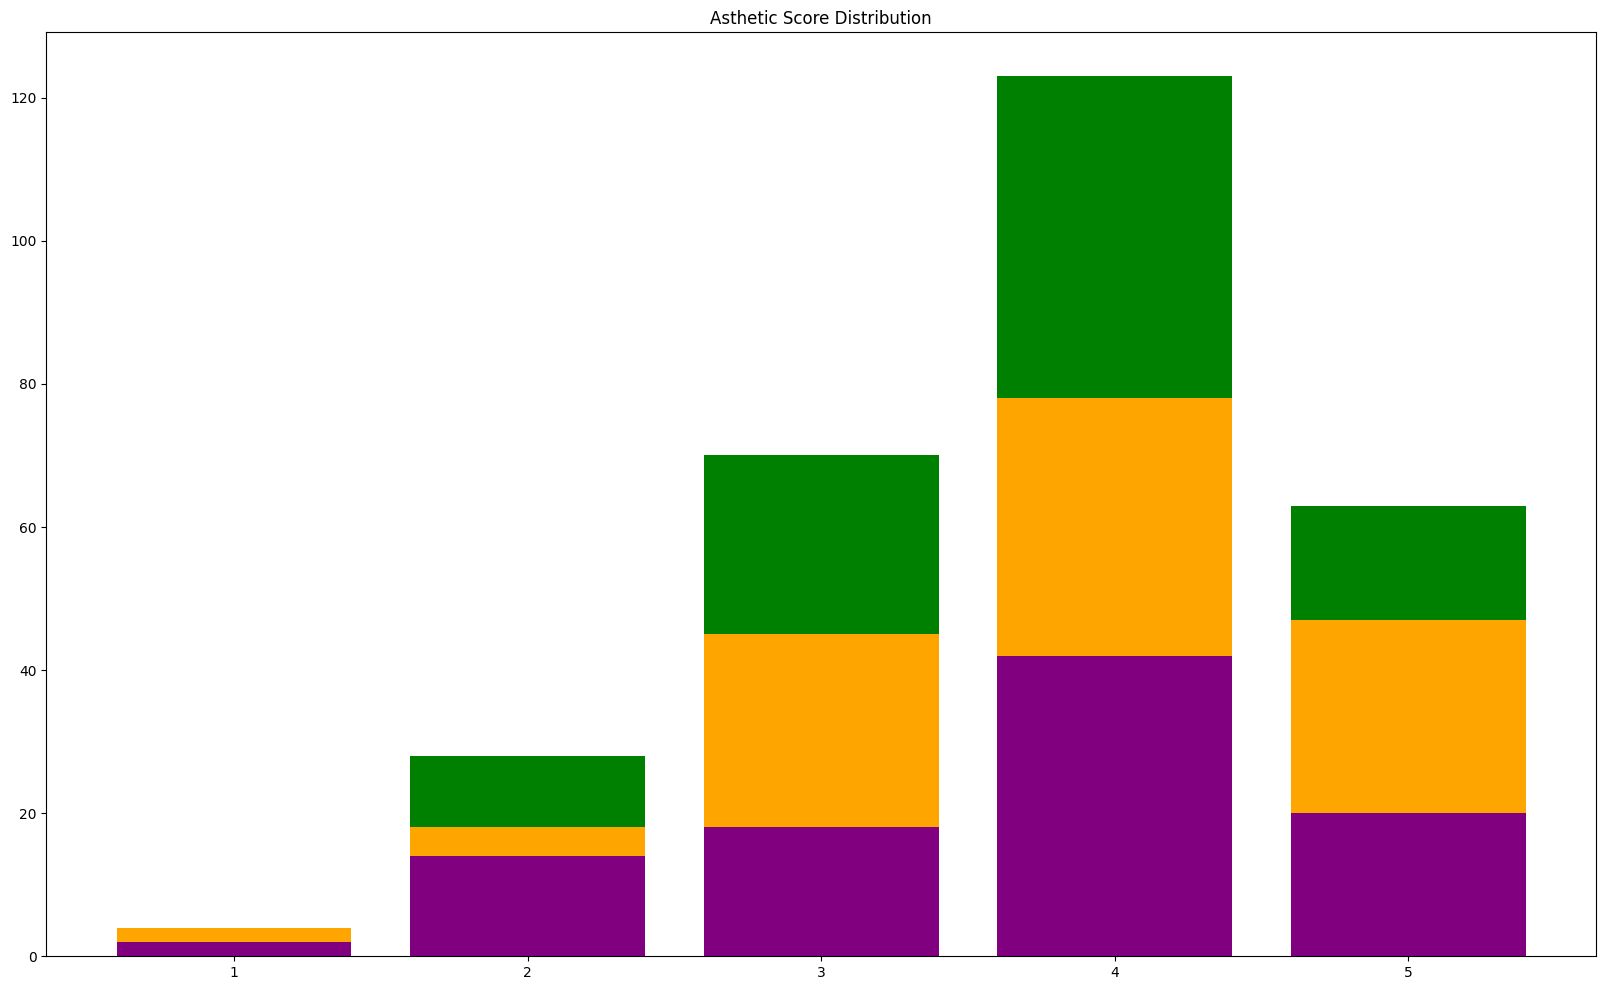

In [97]:
value_range = range(1, 6)
jason_pretty = jason['A'].value_counts().reindex(value_range, fill_value=0)
dylan_pretty = dylan['A'].value_counts().reindex(value_range, fill_value=0)
abby_pretty = abby['A'].value_counts().reindex(value_range, fill_value=0)
print(f"Jason Ashetic Scores:\n{jason_pretty}")
print(f"Dylan Ashetic Scores:\n{dylan_pretty}")
print(f"Abby Ashetic Scores:\n{abby_pretty}")

plt.figure(figsize=(20, 12))
plt.title('Asthetic Score Distribution')
plt.bar(value_range, jason_pretty, color='purple', label='Jason')
plt.bar(value_range, dylan_pretty, color='orange', label='Dylan', bottom=jason_pretty)
plt.bar(value_range, abby_pretty, color='green', label='Abby', bottom=jason_pretty + dylan_pretty)

Jason Track Design Scores:
T
1      0
2      4
3      9
4     11
5     13
6     13
7     18
8     17
9      9
10     2
Name: count, dtype: int64
Dylan Track Design Scores:
T
1      1
2      5
3      2
4     13
5     13
6     15
7     15
8     21
9      8
10     3
Name: count, dtype: int64
Abby Track Design Scores:
T
1      0
2      0
3      3
4     22
5      9
6     14
7     35
8     13
9      0
10     0
Name: count, dtype: int64


<BarContainer object of 10 artists>

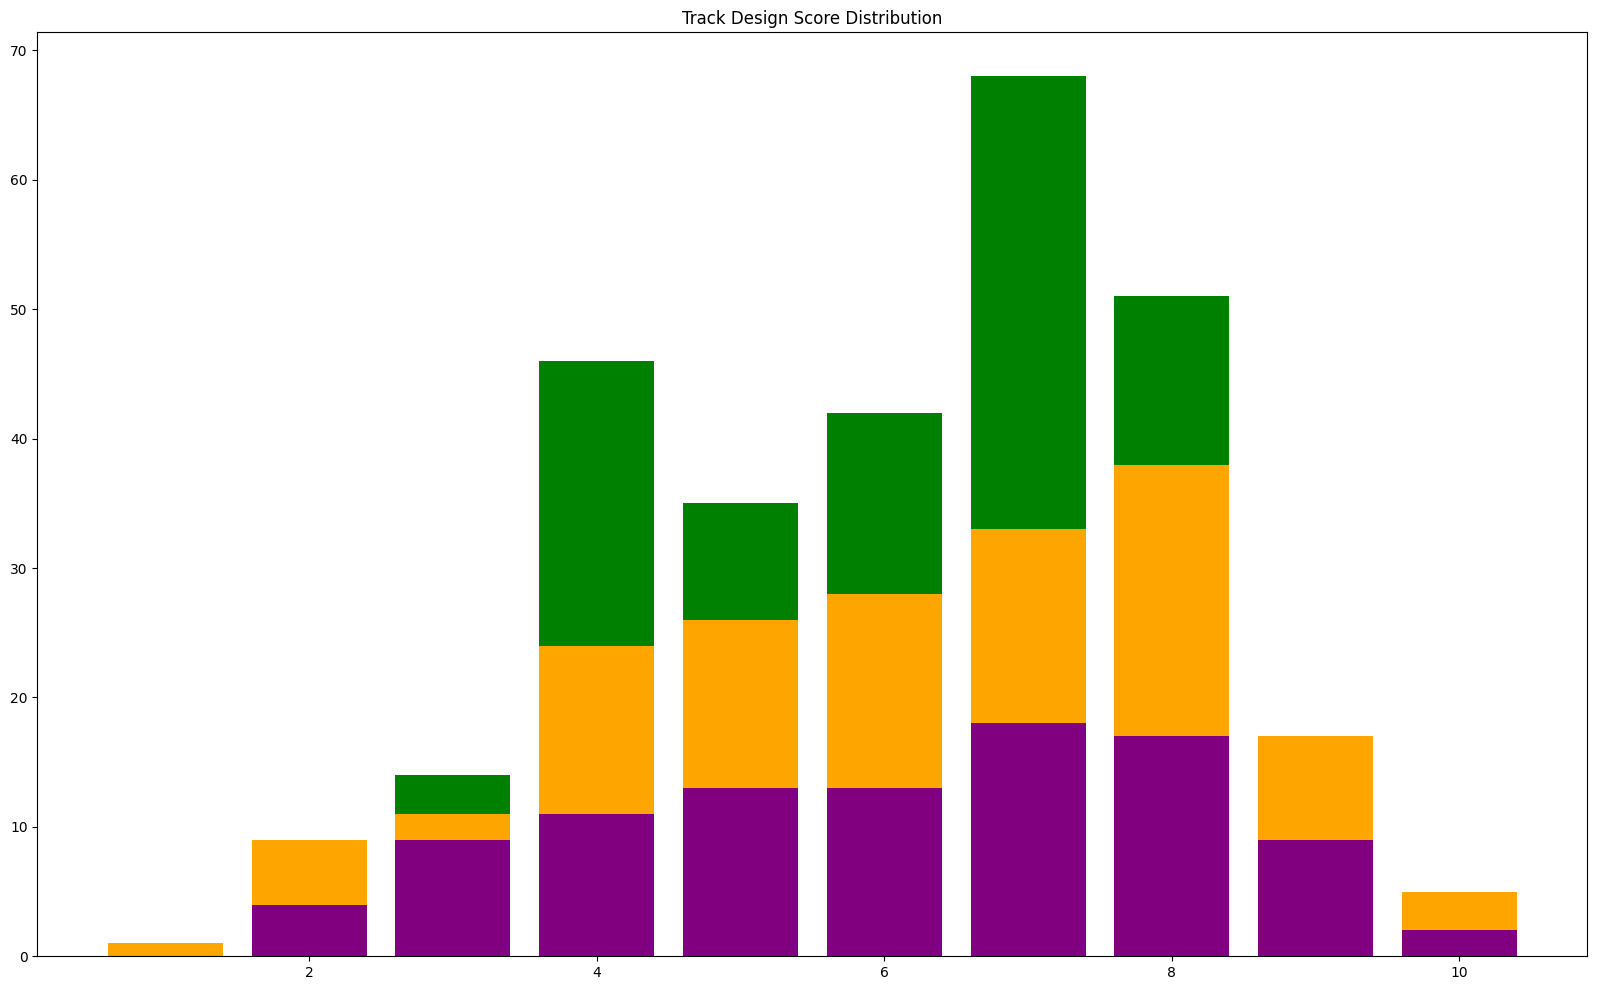

In [98]:
value_range = range(1, 11)
jason_track = jason['T'].value_counts().reindex(value_range, fill_value=0)
dylan_track = dylan['T'].value_counts().reindex(value_range, fill_value=0)
abby_track = abby['T'].value_counts().reindex(value_range, fill_value=0)
print(f"Jason Track Design Scores:\n{jason_track}")
print(f"Dylan Track Design Scores:\n{dylan_track}")
print(f"Abby Track Design Scores:\n{abby_track}")

plt.figure(figsize=(20, 12))
plt.title('Track Design Score Distribution')
plt.bar(value_range, jason_track, color='purple', label='Jason')
plt.bar(value_range, dylan_track, color='orange', label='Dylan', bottom=jason_track)
plt.bar(value_range, abby_track, color='green', label='Abby', bottom=jason_track + dylan_track)

Jason Fun Scores:
F
1      1
2      2
3     12
4     14
5     16
6      5
7     15
8     16
9     14
10     1
Name: count, dtype: int64
Dylan Fun Scores:
F
1      1
2      4
3      6
4     12
5     11
6     17
7     16
8     17
9     10
10     2
Name: count, dtype: int64
Abby Fun Scores:
F
1      0
2      0
3      3
4      9
5     16
6     22
7     22
8     17
9      6
10     1
Name: count, dtype: int64


<BarContainer object of 10 artists>

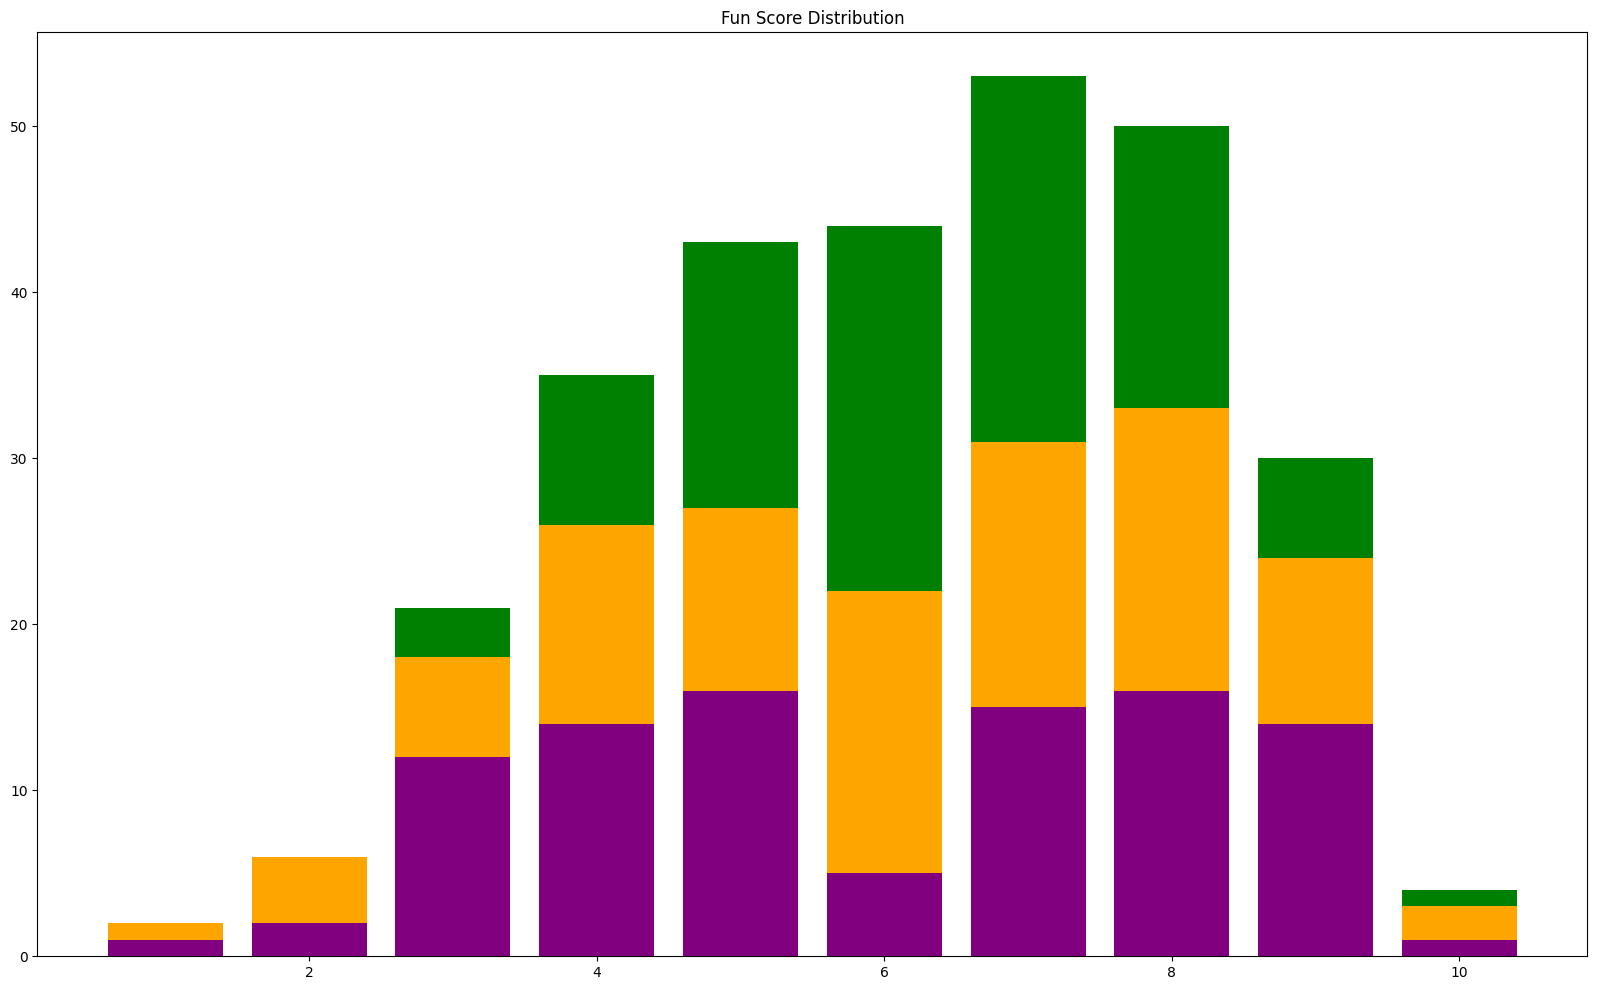

In [99]:
value_range = range(1, 11)
jason_fun = jason['F'].value_counts().reindex(value_range, fill_value=0)
dylan_fun = dylan['F'].value_counts().reindex(value_range, fill_value=0)
abby_fun = abby['F'].value_counts().reindex(value_range, fill_value=0)
print(f"Jason Fun Scores:\n{jason_fun}")
print(f"Dylan Fun Scores:\n{dylan_fun}")
print(f"Abby Fun Scores:\n{abby_fun}")

plt.figure(figsize=(20, 12))
plt.title('Fun Score Distribution')
plt.bar(value_range, jason_fun, color='purple', label='Jason')
plt.bar(value_range, dylan_fun, color='orange', label='Dylan', bottom=jason_fun)
plt.bar(value_range, abby_fun, color='green', label='Abby', bottom=jason_fun + dylan_fun)

In [100]:
jason.sort_values(by='Total', ascending=False, inplace=True)
top10 = jason.head(10)
bottom10 = jason.tail(10)
top10_val = top10['Total'].tolist()
bottom10_val = bottom10['Total'].tolist()
top10_labels = top10['Track'].tolist()
bottom10_labels = bottom10['Track'].tolist()

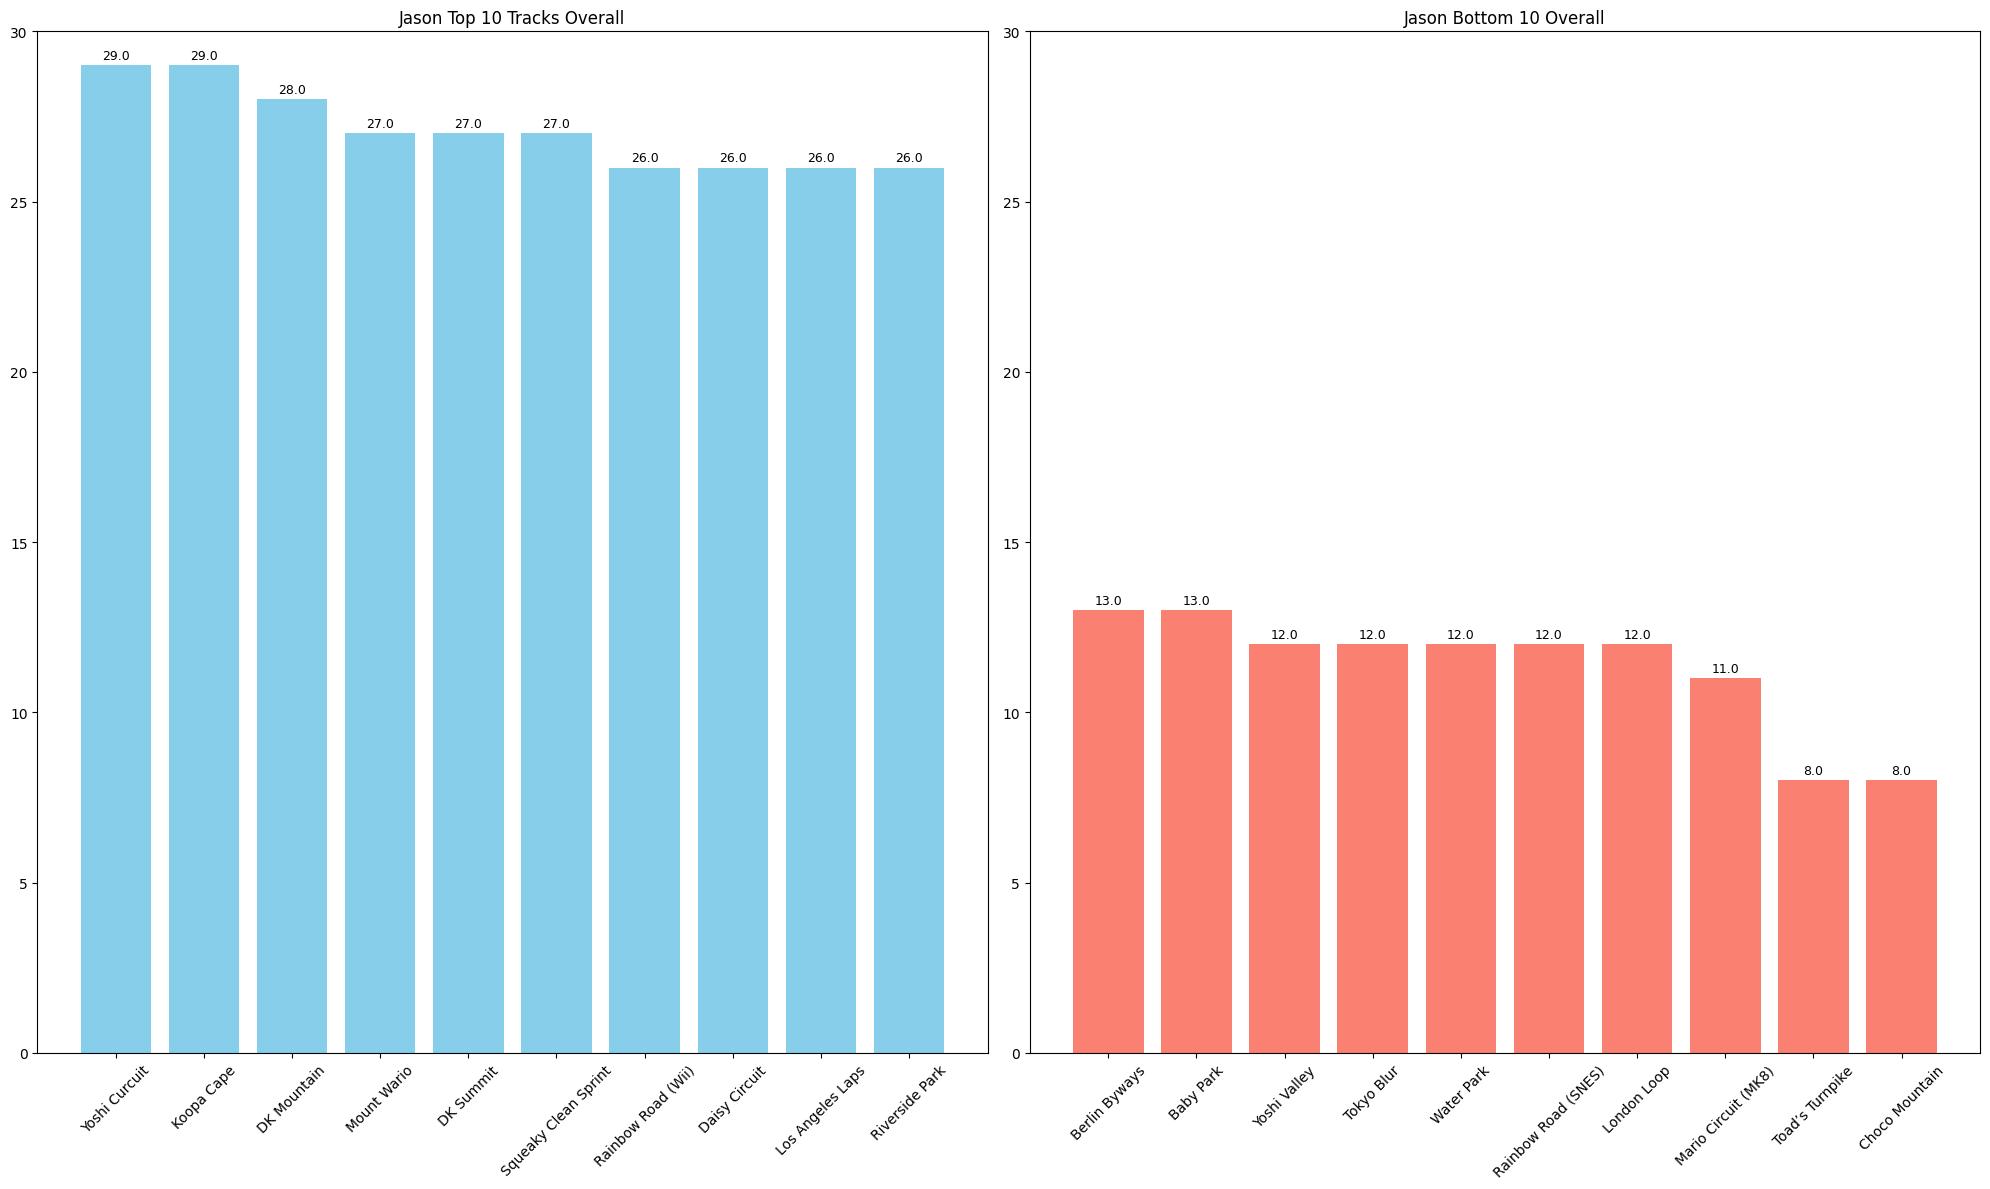

In [101]:
plt.figure(figsize=(20, 12))

# First 10
plt.subplot(1, 2, 1)
plt.ylim(0, 30)
bars = plt.bar(top10_labels, top10_val, color='skyblue')
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.1,
        f'{height:.1f}',
        ha='center', va='bottom', fontsize=9
    )
plt.title('Jason Top 10 Tracks Overall')
plt.xticks(rotation=45)

# Last 10
plt.subplot(1, 2, 2)
plt.ylim(0, 30)
bars = plt.bar(bottom10_labels, bottom10_val, color='salmon')
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.1,
        f'{height:.1f}',
        ha='center', va='bottom', fontsize=9
    )
plt.title('Jason Bottom 10 Overall')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [102]:
dylan.sort_values(by='Total', ascending=False, inplace=True)
top10 = dylan.head(10)
bottom10 = dylan.tail(10)
top10_val = top10['Total'].tolist()
bottom10_val = bottom10['Total'].tolist()
top10_labels = top10['Track'].tolist()
bottom10_labels = bottom10['Track'].tolist()

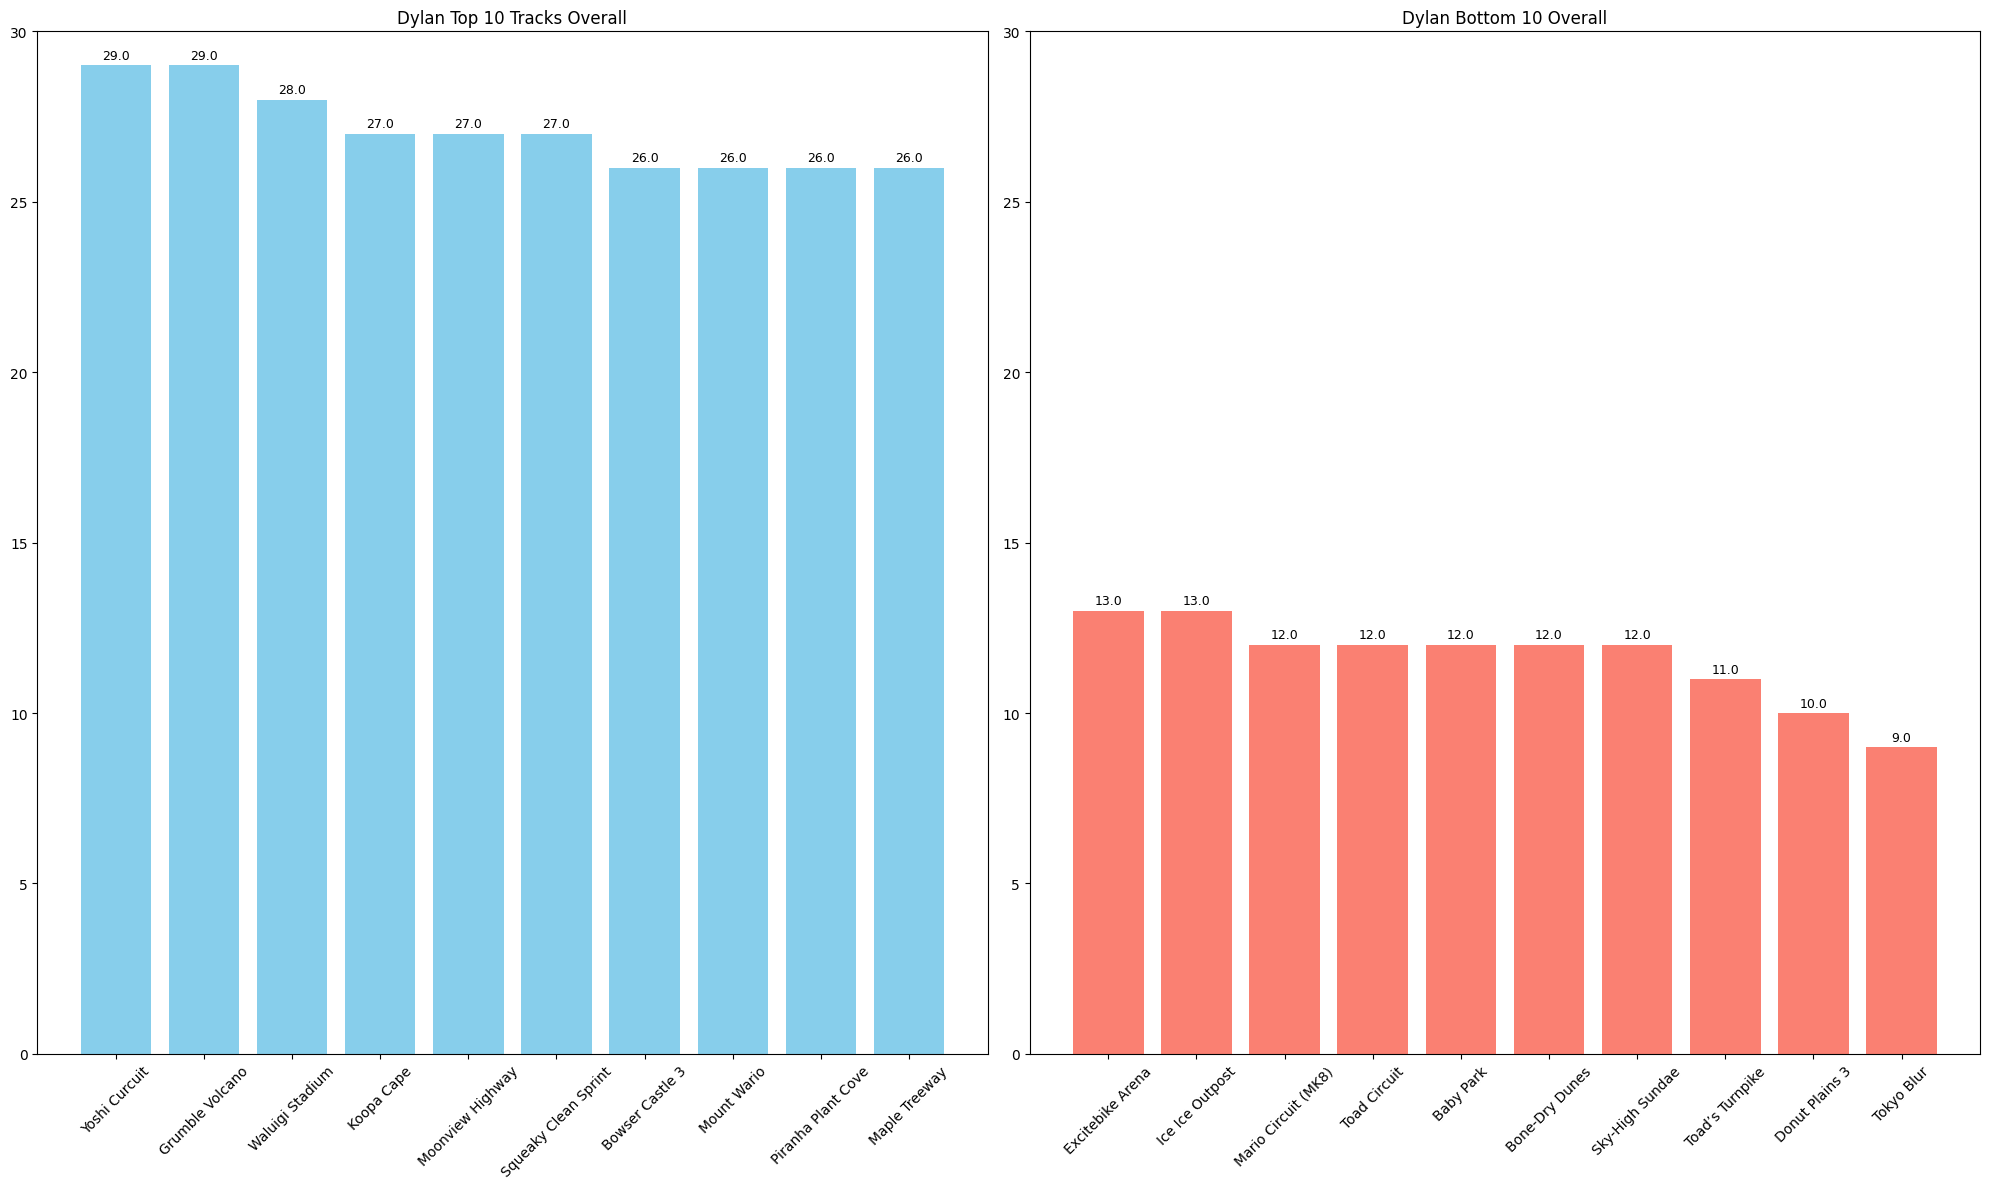

In [103]:
plt.figure(figsize=(20, 12))

# First 10
plt.subplot(1, 2, 1)
plt.ylim(0, 30)
bars = plt.bar(top10_labels, top10_val, color='skyblue')
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.1,
        f'{height:.1f}',
        ha='center', va='bottom', fontsize=9
    )
plt.title('Dylan Top 10 Tracks Overall')
plt.xticks(rotation=45)

# Last 10
plt.subplot(1, 2, 2)
plt.ylim(0, 30)
bars = plt.bar(bottom10_labels, bottom10_val, color='salmon')
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.1,
        f'{height:.1f}',
        ha='center', va='bottom', fontsize=9
    )
plt.title('Dylan Bottom 10 Overall')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [104]:
abby.sort_values(by='Total', ascending=False, inplace=True)
top10 = abby.head(10)
bottom10 = abby.tail(10)
top10_val = top10['Total'].tolist()
bottom10_val = bottom10['Total'].tolist()
top10_labels = top10['Track'].tolist()
bottom10_labels = bottom10['Track'].tolist()

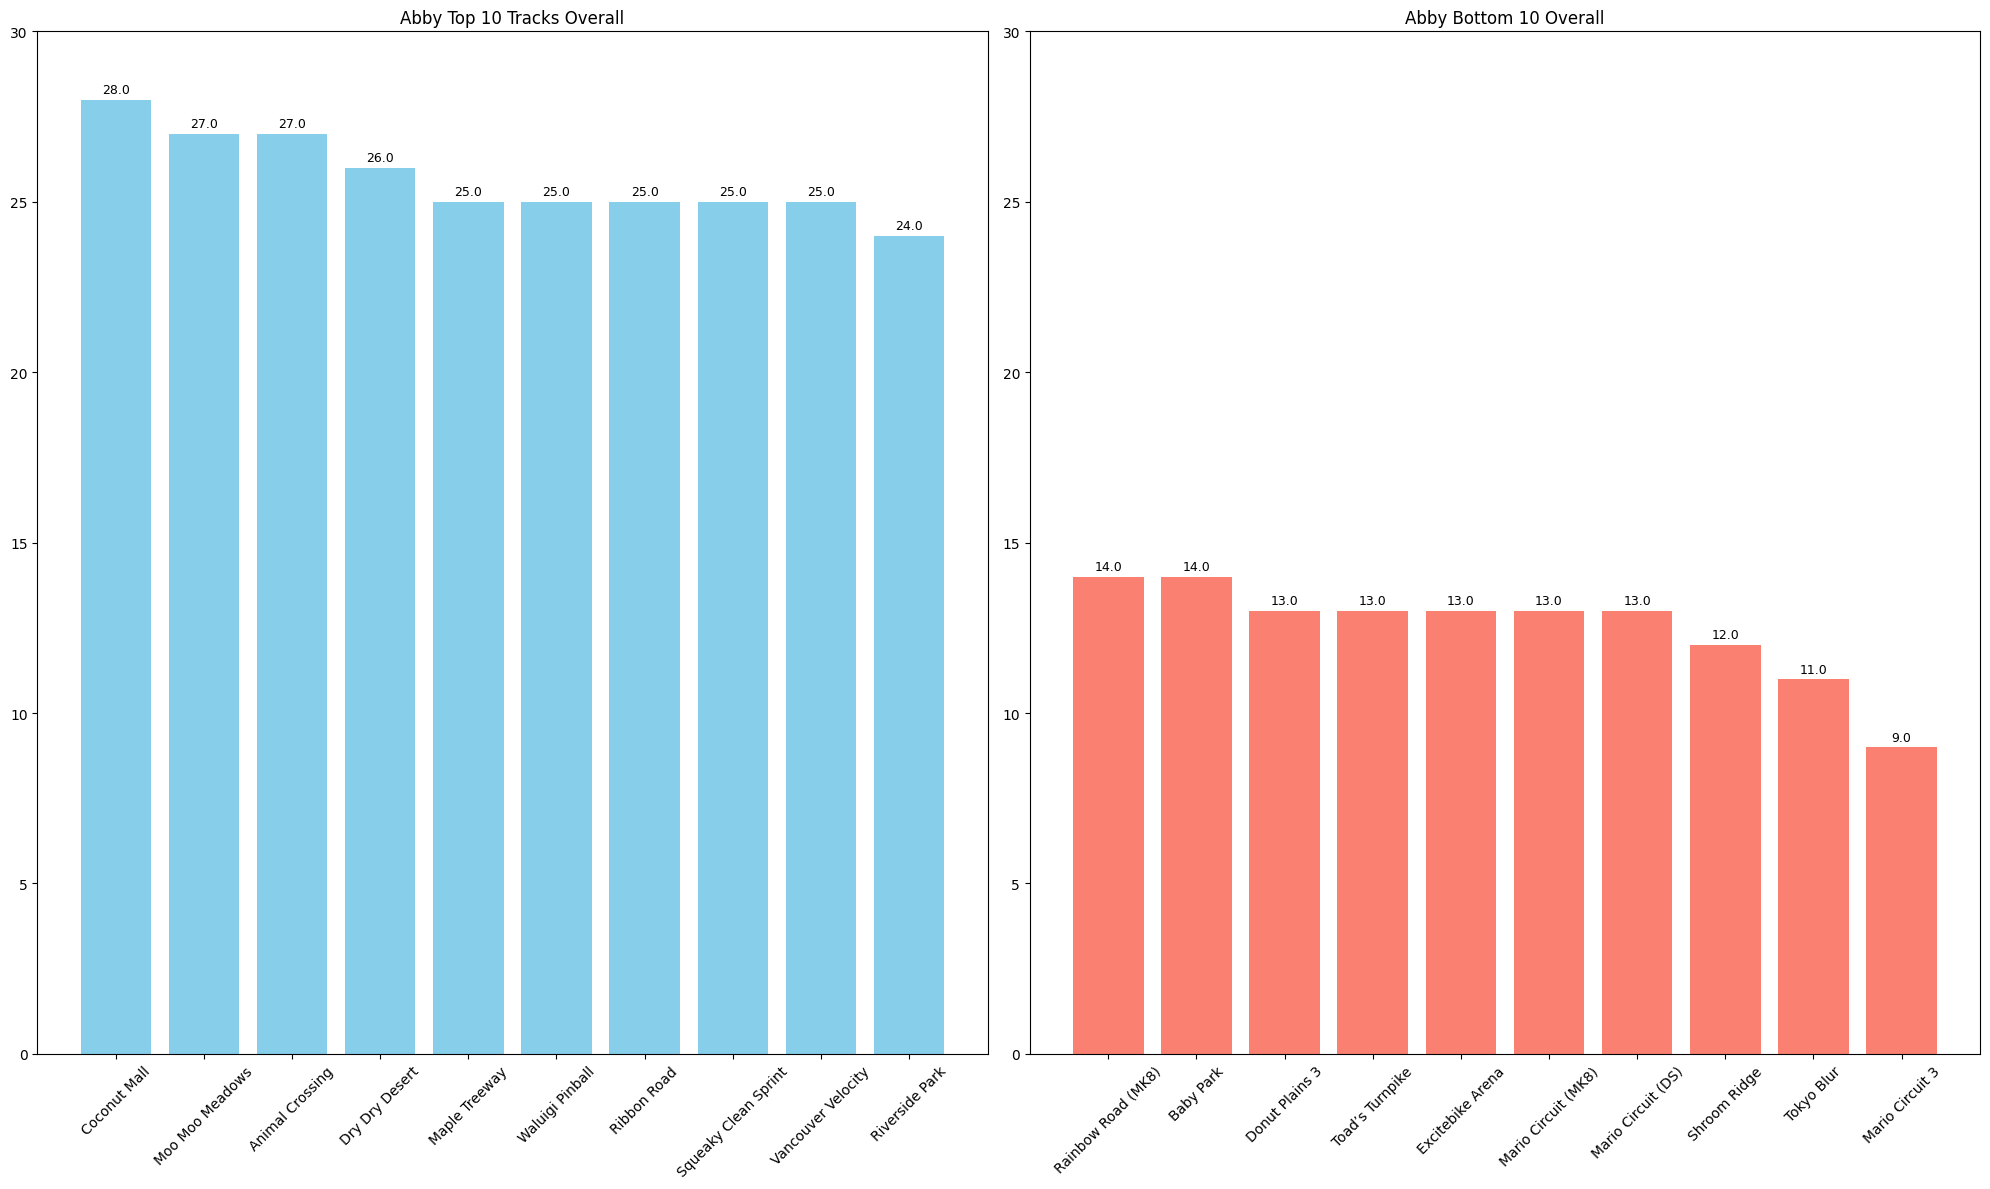

In [105]:
plt.figure(figsize=(20, 12))

# First 10
plt.subplot(1, 2, 1)
plt.ylim(0, 30)
bars = plt.bar(top10_labels, top10_val, color='skyblue')
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.1,
        f'{height:.1f}',
        ha='center', va='bottom', fontsize=9
    )
plt.title('Abby Top 10 Tracks Overall')
plt.xticks(rotation=45)

# Last 10
plt.subplot(1, 2, 2)
plt.ylim(0, 30)
bars = plt.bar(bottom10_labels, bottom10_val, color='salmon')
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.1,
        f'{height:.1f}',
        ha='center', va='bottom', fontsize=9
    )
plt.title('Abby Bottom 10 Overall')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [106]:
total['A_M'] = ((dylan['A_M'] + jason['A_M'] + abby['A_M']) / 3).round(2)
total.sort_values(by='A_M', ascending=False, inplace=True)
top10 = total.head(10)
bottom10 = total.tail(10)
top10_val = top10['A_M'].tolist()
bottom10_val = bottom10['A_M'].tolist()
top10_labels = top10['Track'].tolist()
bottom10_labels = bottom10['Track'].tolist()

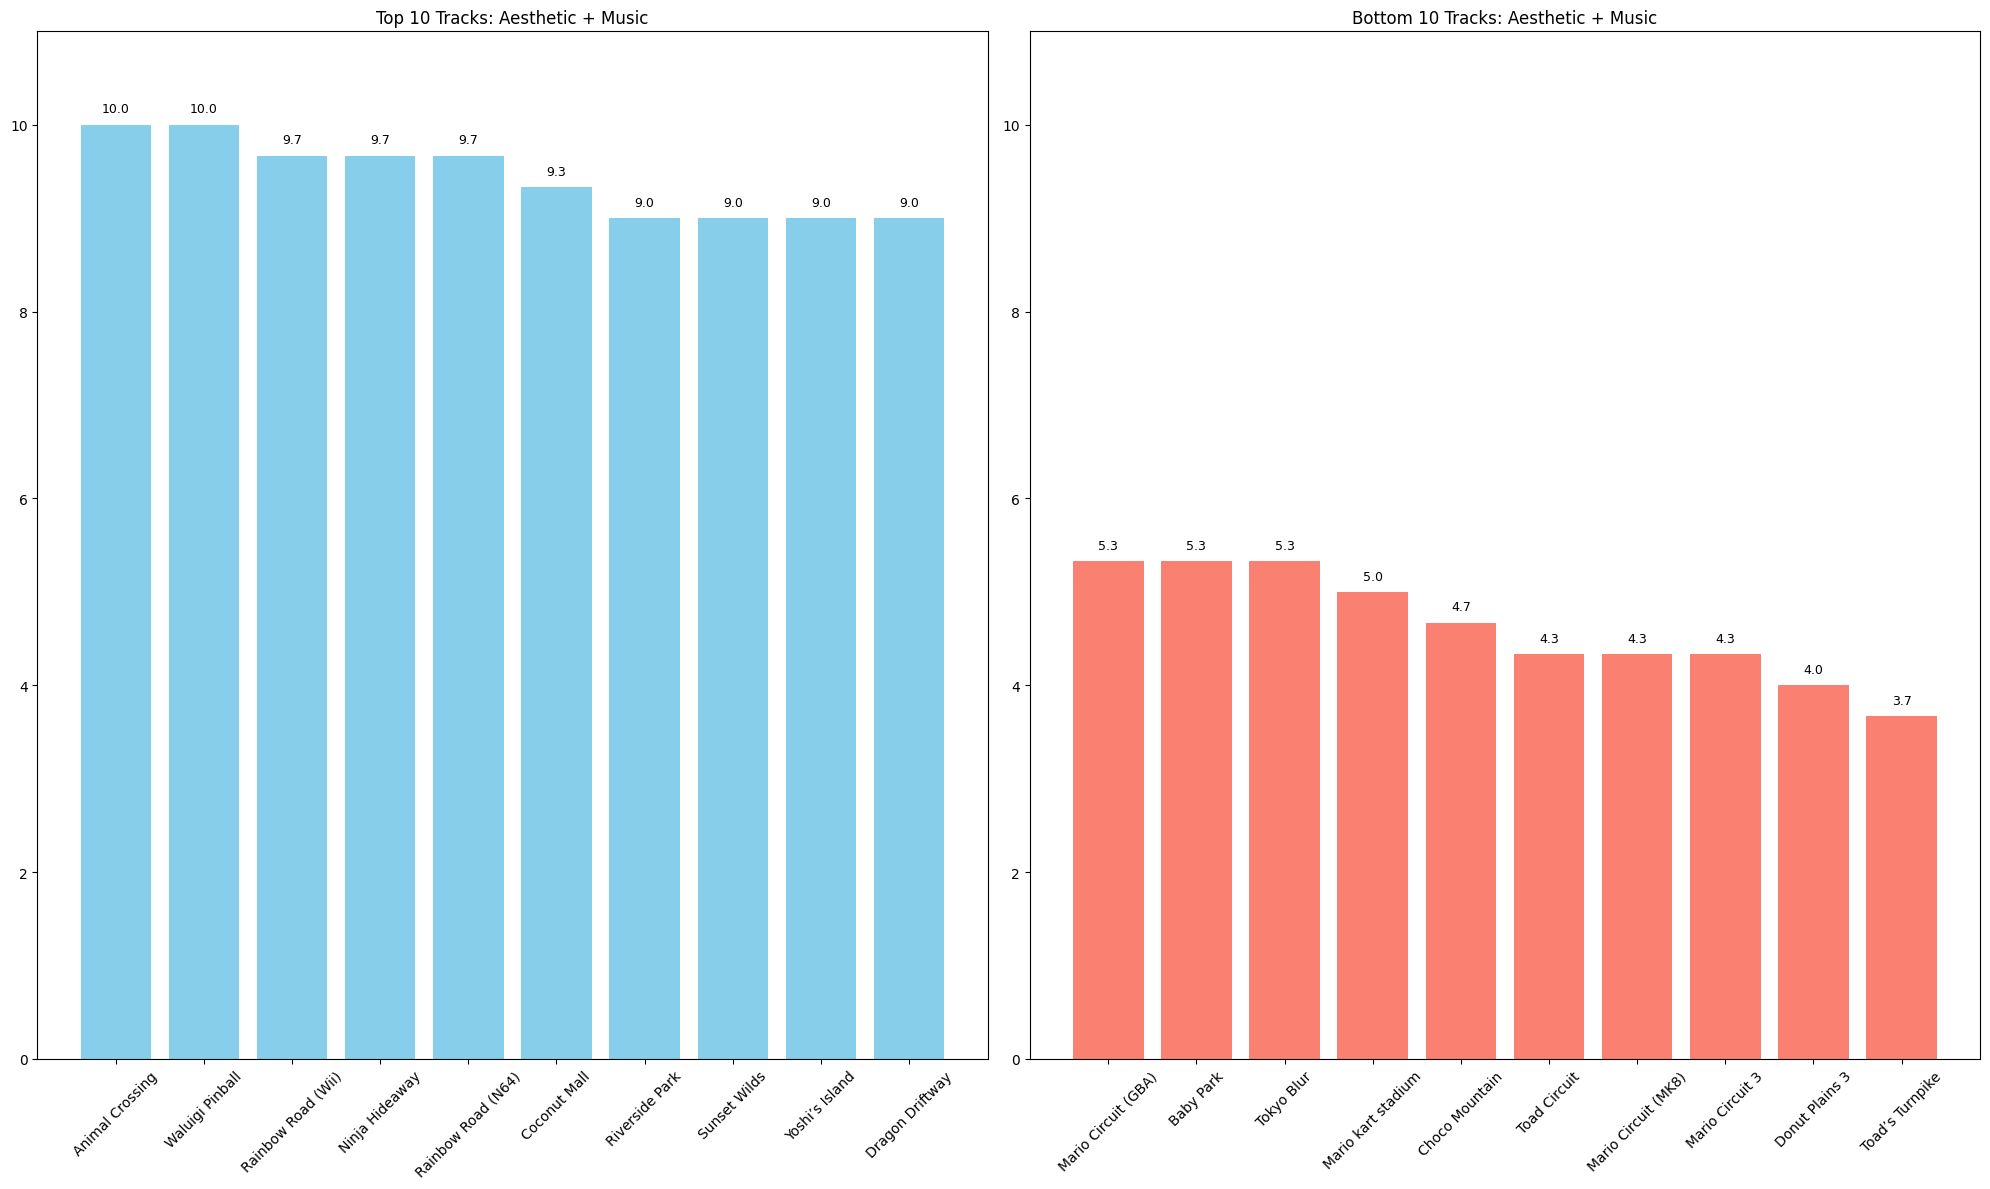

In [107]:
plt.figure(figsize=(20, 12))

# First 10
plt.subplot(1, 2, 1)
plt.ylim(0, 11)
bars = plt.bar(top10_labels, top10_val, color='skyblue')
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.1,
        f'{height:.1f}',
        ha='center', va='bottom', fontsize=9
    )
plt.title('Top 10 Tracks: Aesthetic + Music')
plt.xticks(rotation=45)

# Last 10
plt.subplot(1, 2, 2)
plt.ylim(0, 11)
bars = plt.bar(bottom10_labels, bottom10_val, color='salmon')
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.1,
        f'{height:.1f}',
        ha='center', va='bottom', fontsize=9
    )
plt.title('Bottom 10 Tracks: Aesthetic + Music')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [108]:
total['T_F'] = ((dylan['T_F'] + jason['T_F'] + abby['T_F']) / 3).round(2)
total.sort_values(by='T_F', ascending=False, inplace=True)
top10 = total.head(10)
bottom10 = total.tail(10)
top10_val = top10['T_F'].tolist()
bottom10_val = bottom10['T_F'].tolist()
top10_labels = top10['Track'].tolist()
bottom10_labels = bottom10['Track'].tolist()

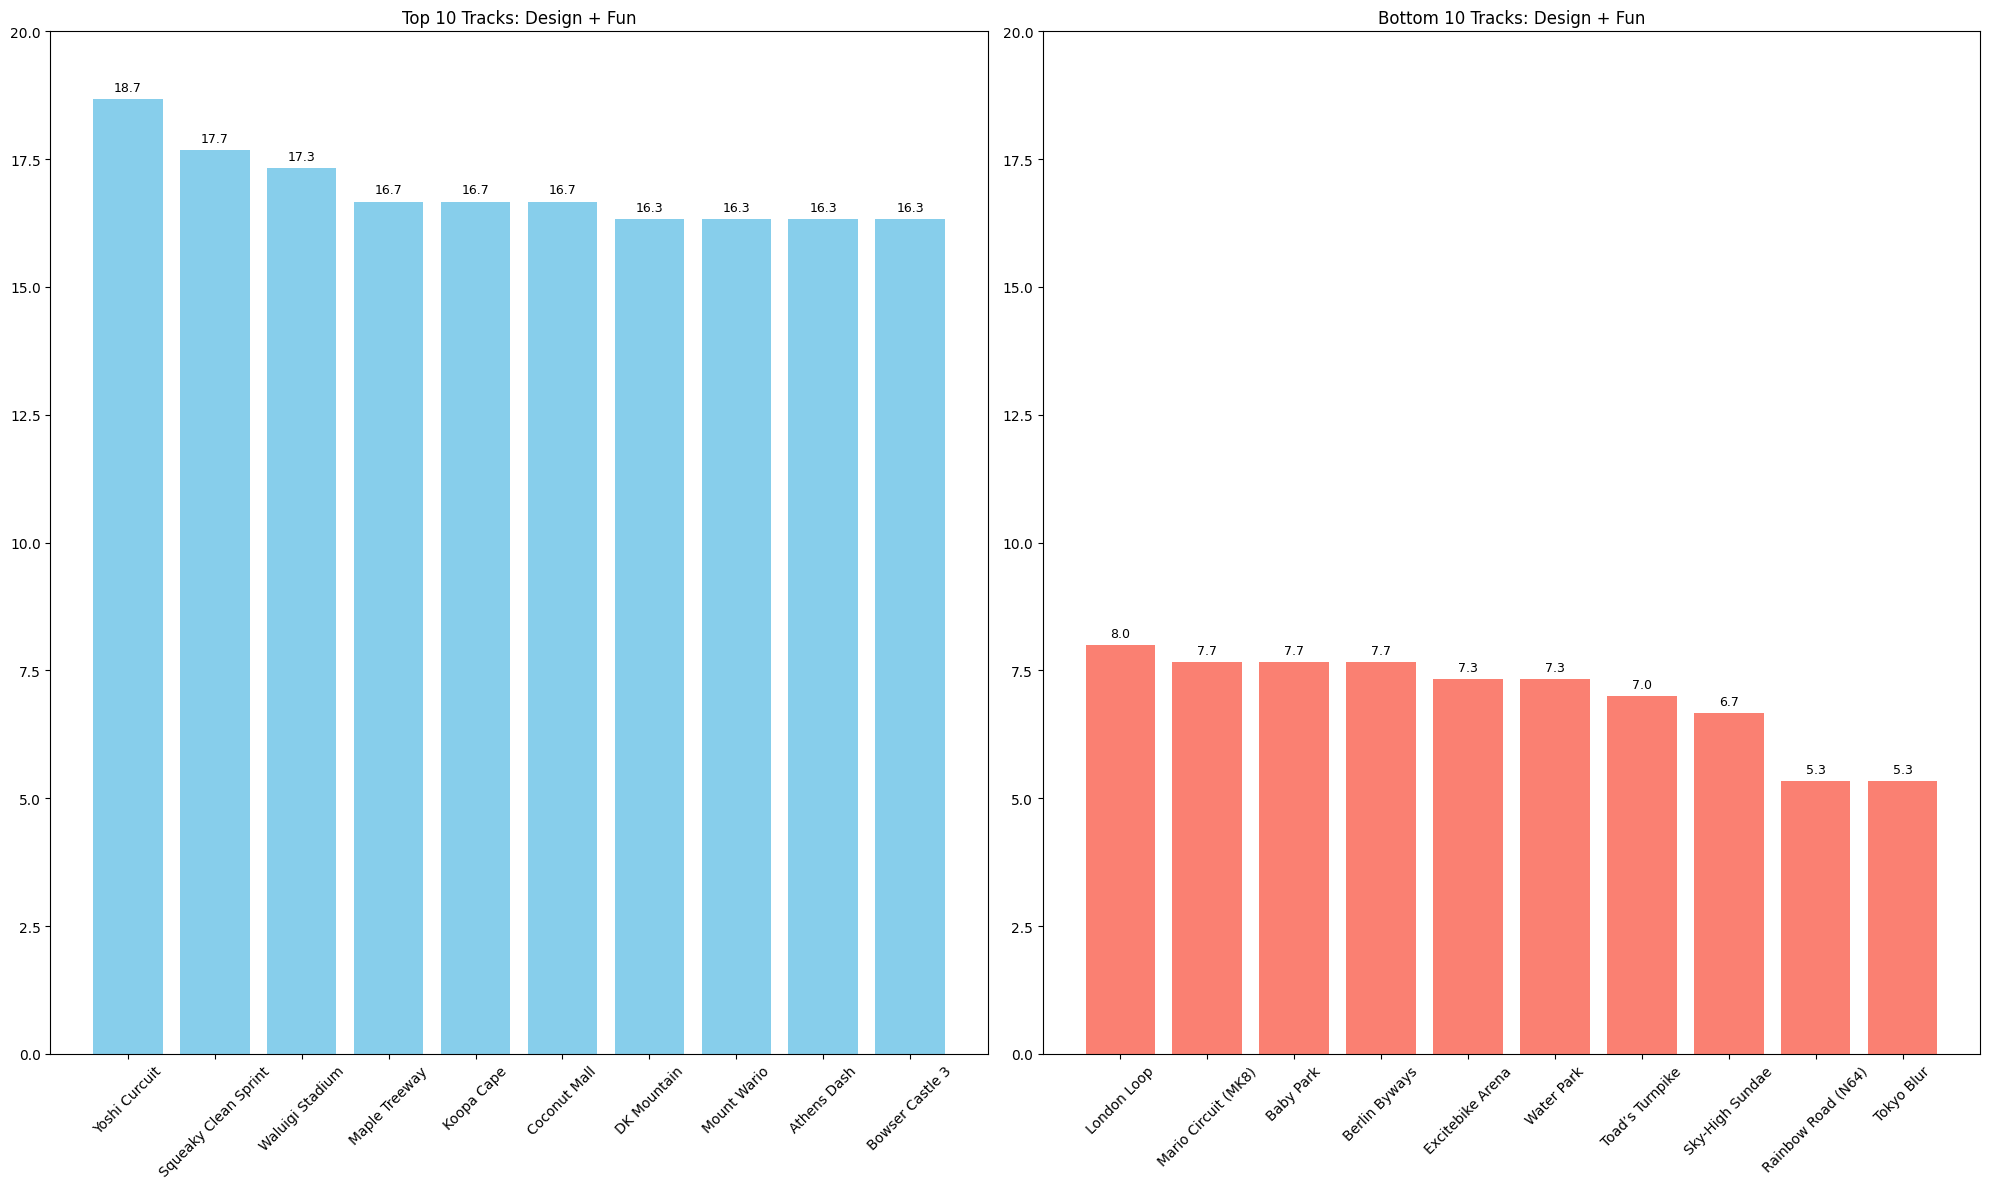

In [109]:
plt.figure(figsize=(20, 12))

# First 10
plt.subplot(1, 2, 1)
plt.ylim(0, 20)
bars = plt.bar(top10_labels, top10_val, color='skyblue')
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.1,
        f'{height:.1f}',
        ha='center', va='bottom', fontsize=9
    )
plt.title('Top 10 Tracks: Design + Fun')
plt.xticks(rotation=45)

# Last 10
plt.subplot(1, 2, 2)
plt.ylim(0, 20)
bars = plt.bar(bottom10_labels, bottom10_val, color='salmon')
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.1,
        f'{height:.1f}',
        ha='center', va='bottom', fontsize=9
    )
plt.title('Bottom 10 Tracks: Design + Fun')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [110]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

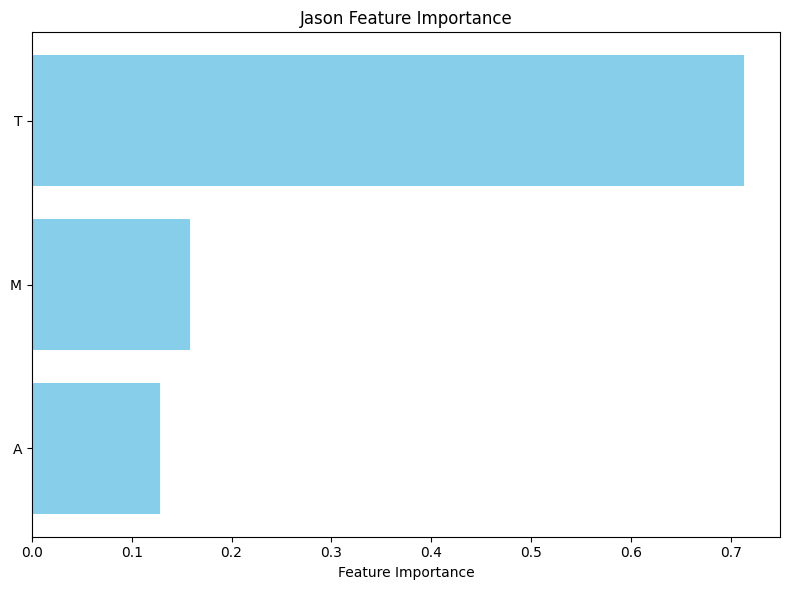

In [111]:
X_j = jason[['A', 'M', 'T']]
X_j_train, X_j_test, y_j_train, y_j_test = train_test_split(X_j, jason['F'], test_size=0.2, random_state=42)
model = RandomForestRegressor()
model.fit(X_j_train, y_j_train)
fi_j = model.feature_importances_
feature_names = X_j.columns
feat_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': fi_j
}).sort_values(by='Importance', ascending=True)
plt.figure(figsize=(8, 6))
plt.barh(feat_df['Feature'], feat_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Jason Feature Importance')
plt.tight_layout()
plt.show()

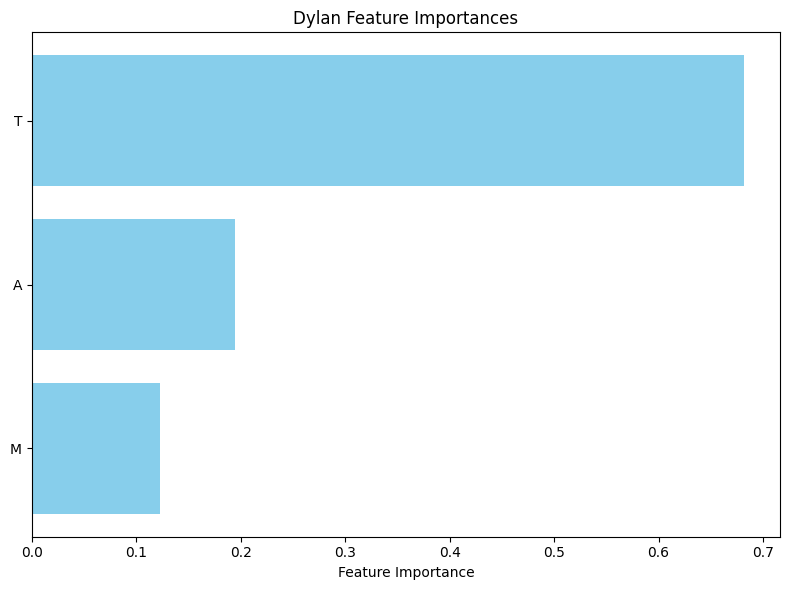

In [112]:
X_d = dylan[['A', 'M', 'T']]
X_d_train, X_d_test, y_d_train, y_d_test = train_test_split(X_d, dylan['F'], test_size=0.2, random_state=42)
model = RandomForestRegressor()
model.fit(X_d_train, y_d_train)
fi_d = model.feature_importances_
feature_names = X_d.columns
feat_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': fi_d
}).sort_values(by='Importance', ascending=True)
plt.figure(figsize=(8, 6))
plt.barh(feat_df['Feature'], feat_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Dylan Feature Importances')
plt.tight_layout()
plt.show()

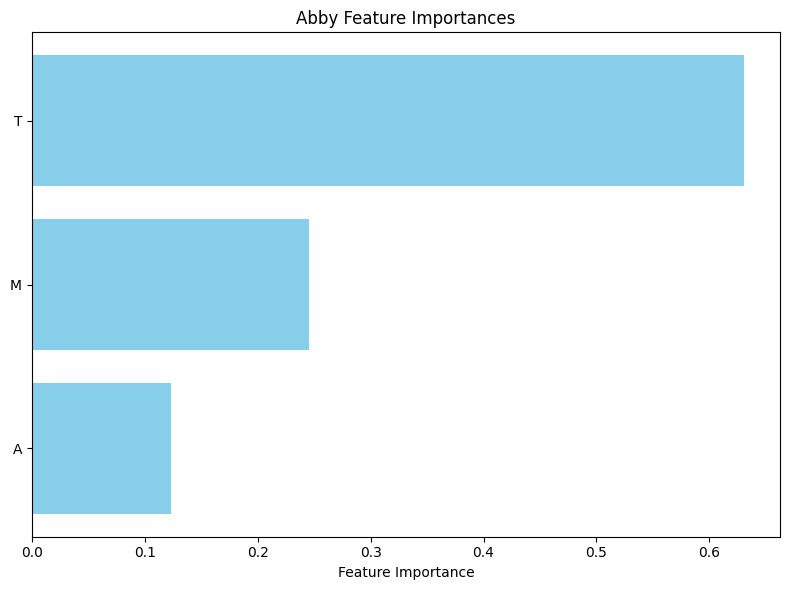

In [113]:
X_a = abby[['A', 'M', 'T']]
X_a_train, X_a_test, y_a_train, y_a_test = train_test_split(X_a, abby['F'], test_size=0.2, random_state=42)
model = RandomForestRegressor()
model.fit(X_a_train, y_a_train)
fi_a = model.feature_importances_
feature_names = X_a.columns
feat_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': fi_a
}).sort_values(by='Importance', ascending=True)
plt.figure(figsize=(8, 6))
plt.barh(feat_df['Feature'], feat_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Abby Feature Importances')
plt.tight_layout()
plt.show()